# QMF Project - COVID-19 World Population Gap Analysis

## ARIMA & SARIMA PART

### Import libs

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# stats libs
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:/Users/humic/OneDrive/Documents/Ecole/SorbonneFTD/Cours/Quantitative_Method_Finance/project/data')

### Import data

In [3]:
monthly_pop_data = pd.read_excel("monthly_population.xlsx", skiprows=6)
monthly_pop_data = monthly_pop_data.iloc[:-2,:] # ignore the footer of the file

# save the name of column into a list
col_list = monthly_pop_data["Unnamed: 0"].tolist()

# ignore the columns
monthly_pop_data = monthly_pop_data.iloc[:, 1:]

# transpose the dataframe
monthly_pop_data = monthly_pop_data.transpose()

# rename the dataframe
monthly_pop_data.columns = col_list

# convert to datetime the index of the dataframe
monthly_pop_data.index = pd.to_datetime(monthly_pop_data.index, format='%m/%Y')
monthly_pop_data

World Total Countries Albania Algeria  Argentina Australia  \
2023-10-01           -         -       -       -   46.60956         -   
2023-09-01           -         -       -       -   46.60956         -   
2023-08-01           -         -       -       -   46.60956         -   
2023-07-01           -         -       -       -   46.60956         -   
2023-06-01           -         -       -       -   46.60956         -   
...                ...       ...     ...     ...        ...       ...   
1994-03-01           -         -       -  27.496  34.846916   17.7721   
1994-02-01           -         -       -  27.496  34.846916   17.7721   
1994-01-01           -         -       -  27.496  34.846916   17.7721   
1993-12-01           -         -       -  26.894  34.407177   17.7191   
1993-11-01           -         -       -  26.894  34.407177   17.7191   

             Austria Azerbaijan   Bahrain  Bangladesh  ...  \
2023-10-01  9.104772  10.420515         -           -  ...   
2023-09-01  9.104772  10.420515         -           -  ...   
2023-08-01  9.104772  10.420515         -           -  ...   
2023-07-01  9.104772  10.420515         -           -  ...   
2023-06-01  9.104772  10.420515         -           -  ...   
...              ...        ...       ...         ...  ...   
1994-03-01  7.928746   7.952142  0.544366  112.737686  ...   
1994-02-01  7.928746   7.952142  0.544366  112.737686  ...   
1994-01-01  7.928746   7.952142  0.544366  112.737686  ...   
1993-12-01  7.882519   7.839115  0.530225   110.35064  ...   
1993-11-01  7.882519   7.839115  0.530225   110.35064  ...   

           United Arab Emirates United Kingdom United States   Uruguay  \
2023-10-01                    -              -     339.66513  3.416264   
2023-09-01                    -              -     339.66513  3.416264   
2023-08-01                    -              -     339.66513  3.416264   
2023-07-01                    -              -     339.66513  3.416264   
2023-06-01                    -              -     339.66513  3.416264   
...                         ...            ...           ...       ...   
1994-03-01                2.217        57.8621     263.12582  3.137032   
1994-02-01                2.217        57.8621     263.12582  3.137032   
1994-01-01                2.217        57.8621     263.12582  3.137032   
1993-12-01                2.097        57.7139      259.9186  3.123831   
1993-11-01                2.097        57.7139      259.9186  3.123831   

           Uzbekistan  Venezuela  Vietnam      Yemen     Zambia Zimbabwe  
2023-10-01  31.360836  33.728622        -          -  19.464165        -  
2023-09-01  31.360836  33.728622        -          -  19.464165        -  
2023-08-01  31.360836  33.728622        -          -  19.464165        -  
2023-07-01  31.360836  33.728622        -          -  19.464165        -  
2023-06-01  31.360836  33.728622        -          -  19.464165        -  
...               ...        ...      ...        ...        ...      ...  
1994-03-01  22.603815  21.582756  70.8245  14.297617          -     11.1  
1994-02-01  22.603815  21.582756  70.8245  14.297617          -     11.1  
1994-01-01  22.603815  21.582756  70.8245  14.297617          -     11.1  
1993-12-01  22.127596  21.121216  69.6445  13.634082          -     10.8  
1993-11-01  22.127596  21.121216  69.6445  13.634082          -     10.8  

[360 rows x 106 columns]

In [4]:
# Select the countries we want to study
monthly_pop_data = monthly_pop_data[["Argentina", "China", "France", "New Zealand", "Norway"]]
monthly_pop_data = monthly_pop_data.replace('-', np.nan)
monthly_pop_data.index.name = "Month"

# Sort index
monthly_pop_data = monthly_pop_data.sort_index(ascending=True)
monthly_pop_data

Argentina    China  France  New Zealand    Norway
Month                                                        
1993-11-01  34.407177  1185.17     NaN       3.5978  4.299167
1993-12-01  34.407177  1185.17     NaN       3.5978  4.299167
1994-01-01  34.846916  1198.50  59.070       3.6115  4.324815
1994-02-01  34.846916  1198.50  59.078       3.6115  4.324815
1994-03-01  34.846916  1198.50  59.090       3.6115  4.324815
...               ...      ...     ...          ...       ...
2023-06-01  46.609560      NaN  68.113       5.2231  5.488984
2023-07-01  46.609560      NaN  68.136          NaN  5.488984
2023-08-01  46.609560      NaN  68.161          NaN  5.488984
2023-09-01  46.609560      NaN  68.184          NaN  5.488984
2023-10-01  46.609560      NaN     NaN          NaN  5.488984

[360 rows x 5 columns]

In [5]:
# Display rows with NaN values
rows_with_nan = monthly_pop_data[monthly_pop_data.isnull().any(axis=1)]
rows_with_nan

Argentina    China  France  New Zealand    Norway
Month                                                        
1993-11-01  34.407177  1185.17     NaN       3.5978  4.299167
1993-12-01  34.407177  1185.17     NaN       3.5978  4.299167
2023-01-01  46.609560      NaN  68.043       5.1982  5.488984
2023-02-01  46.609560      NaN  68.049       5.1982  5.488984
2023-03-01  46.609560      NaN  68.063       5.1982  5.488984
2023-04-01  46.609560      NaN  68.078       5.2231  5.488984
2023-05-01  46.609560      NaN  68.094       5.2231  5.488984
2023-06-01  46.609560      NaN  68.113       5.2231  5.488984
2023-07-01  46.609560      NaN  68.136          NaN  5.488984
2023-08-01  46.609560      NaN  68.161          NaN  5.488984
2023-09-01  46.609560      NaN  68.184          NaN  5.488984
2023-10-01  46.609560      NaN     NaN          NaN  5.488984

### Deal with `NaN`   

Fill `NaN` values with the previous value (forward fill)

Since we're dealing with monthly data, births from one month to the next don't change much, so we choose to fill in the NaN value with the previous value.

However, when the previous value is a NaN value (i.e. several consecutive NaN values), the NaN value remains unchanged.

In [6]:
# Fill NaN values with the previous value (forward fill)
monthly_pop_data.fillna(method='ffill', inplace=True)

### Check for remains `NaN` values   

In [7]:
rows_with_nan_bis = monthly_pop_data[monthly_pop_data.isnull().any(axis=1)]
rows_with_nan_bis

Argentina    China  France  New Zealand    Norway
Month                                                        
1993-11-01  34.407177  1185.17     NaN       3.5978  4.299167
1993-12-01  34.407177  1185.17     NaN       3.5978  4.299167

You can see that there's not much `NaN` value left. What's more, most of these values concern the year 2023, which is of no interest to us for our study, as we wish to predict the population beyond March 2020 (the month in which COVID makes its appearance).

In [8]:
monthly_pop_data = monthly_pop_data.dropna()
monthly_pop_data

Argentina    China  France  New Zealand    Norway
Month                                                        
1994-01-01  34.846916  1198.50  59.070       3.6115  4.324815
1994-02-01  34.846916  1198.50  59.078       3.6115  4.324815
1994-03-01  34.846916  1198.50  59.090       3.6115  4.324815
1994-04-01  34.846916  1198.50  59.105       3.6200  4.324815
1994-05-01  34.846916  1198.50  59.122       3.6200  4.324815
...               ...      ...     ...          ...       ...
2023-06-01  46.609560  1411.75  68.113       5.2231  5.488984
2023-07-01  46.609560  1411.75  68.136       5.2231  5.488984
2023-08-01  46.609560  1411.75  68.161       5.2231  5.488984
2023-09-01  46.609560  1411.75  68.184       5.2231  5.488984
2023-10-01  46.609560  1411.75  68.184       5.2231  5.488984

[358 rows x 5 columns]

#### Split the dataframe between non-covid period and covid period

As our goal is to predict the population with the COVID pandemic doesn't exist we choose to split the dataset into two dataframe by considering that the official date of COVID is `2020-04-01`

In [9]:
# Select the data during the covid period
monthly_covid_pop_data = monthly_pop_data[monthly_pop_data.index > pd.to_datetime('2020-04-01')]
monthly_covid_pop_data

Argentina    China  France  New Zealand    Norway
Month                                                        
2020-05-01  45.479120  1412.12  67.483       5.0902  5.367580
2020-06-01  45.479120  1412.12  67.506       5.0902  5.367580
2020-07-01  45.479120  1412.12  67.532       5.0987  5.367580
2020-08-01  45.479120  1412.12  67.562       5.0987  5.367580
2020-09-01  45.479120  1412.12  67.586       5.0987  5.367580
2020-10-01  45.479120  1412.12  67.610       5.1037  5.367580
2020-11-01  45.479120  1412.12  67.627       5.1037  5.367580
2020-12-01  45.479120  1412.12  67.630       5.1037  5.367580
2021-01-01  45.862620  1412.60  67.635       5.1079  5.391369
2021-02-01  45.862620  1412.60  67.633       5.1079  5.391369
2021-03-01  45.862620  1412.60  67.638       5.1079  5.391369
2021-04-01  45.862620  1412.60  67.652       5.1113  5.391369
2021-05-01  45.862620  1412.60  67.665       5.1113  5.391369
2021-06-01  45.862620  1412.60  67.685       5.1113  5.391369
2021-07-01  45.862620  1412.60  67.710       5.1150  5.391369
2021-08-01  45.862620  1412.60  67.738       5.1150  5.391369
2021-09-01  45.862620  1412.60  67.762       5.1150  5.391369
2021-10-01  45.862620  1412.60  67.788       5.1165  5.391369
2021-11-01  45.862620  1412.60  67.812       5.1165  5.391369
2021-12-01  45.862620  1412.60  67.832       5.1165  5.391369
2022-01-01  46.239388  1411.75  67.843       5.1149  5.425270
2022-02-01  46.239388  1411.75  67.848       5.1149  5.425270
2022-03-01  46.239388  1411.75  67.859       5.1149  5.425270
2022-04-01  46.239388  1411.75  67.874       5.1172  5.425270
2022-05-01  46.239388  1411.75  67.888       5.1172  5.425270
2022-06-01  46.239388  1411.75  67.911       5.1172  5.425270
2022-07-01  46.239388  1411.75  67.936       5.1302  5.425270
2022-08-01  46.239388  1411.75  67.958       5.1302  5.425270
2022-09-01  46.239388  1411.75  67.981       5.1302  5.425270
2022-10-01  46.239388  1411.75  68.004       5.1571  5.425270
2022-11-01  46.239388  1411.75  68.020       5.1571  5.425270
2022-12-01  46.239388  1411.75  68.037       5.1571  5.425270
2023-01-01  46.609560  1411.75  68.043       5.1982  5.488984
2023-02-01  46.609560  1411.75  68.049       5.1982  5.488984
2023-03-01  46.609560  1411.75  68.063       5.1982  5.488984
2023-04-01  46.609560  1411.75  68.078       5.2231  5.488984
2023-05-01  46.609560  1411.75  68.094       5.2231  5.488984
2023-06-01  46.609560  1411.75  68.113       5.2231  5.488984
2023-07-01  46.609560  1411.75  68.136       5.2231  5.488984
2023-08-01  46.609560  1411.75  68.161       5.2231  5.488984
2023-09-01  46.609560  1411.75  68.184       5.2231  5.488984
2023-10-01  46.609560  1411.75  68.184       5.2231  5.488984

In [10]:
# Select the period we want to study and ignore the covid period
monthly_pop_data = monthly_pop_data[monthly_pop_data.index <= pd.to_datetime('2020-04-01')]
monthly_pop_data

Argentina    China  France  New Zealand    Norway
Month                                                        
1994-01-01  34.846916  1198.50  59.070       3.6115  4.324815
1994-02-01  34.846916  1198.50  59.078       3.6115  4.324815
1994-03-01  34.846916  1198.50  59.090       3.6115  4.324815
1994-04-01  34.846916  1198.50  59.105       3.6200  4.324815
1994-05-01  34.846916  1198.50  59.122       3.6200  4.324815
...               ...      ...     ...          ...       ...
2019-12-01  45.089493  1410.08  67.430       5.0404  5.328212
2020-01-01  45.479120  1412.12  67.442       5.0828  5.367580
2020-02-01  45.479120  1412.12  67.457       5.0828  5.367580
2020-03-01  45.479120  1412.12  67.473       5.0828  5.367580
2020-04-01  45.479120  1412.12  67.481       5.0902  5.367580

[316 rows x 5 columns]

### Important note
We will focus our analysis during non-covid period data

### Summarize the data with boxplot

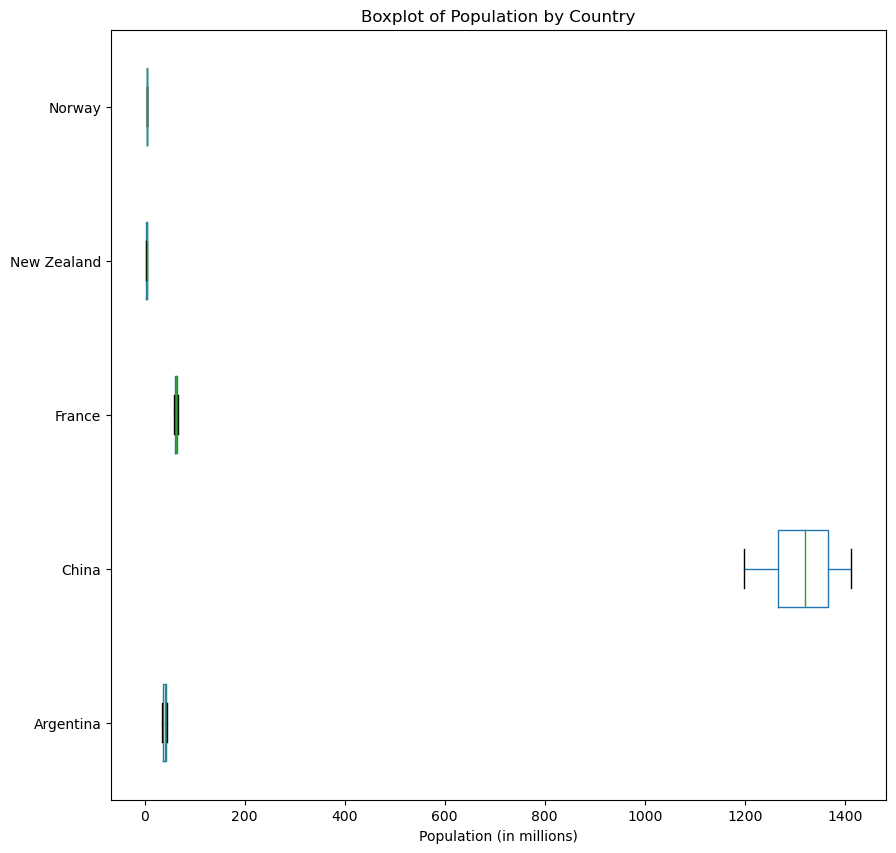

In [11]:
# Create a boxplot for each column on a single graph
plt.figure(figsize=(10, 10))
monthly_pop_data.boxplot(["Argentina", "China", "France", "New Zealand", "Norway"], vert=False)
plt.xlabel('Population (in millions)')
plt.title('Boxplot of Population by Country')
plt.grid()

plt.show()

### Let's plot evolution of the population for the following countries:

- Argentina
- China
- France
- New Zealand
- Norway

Montly Evolution of Population (in millions)


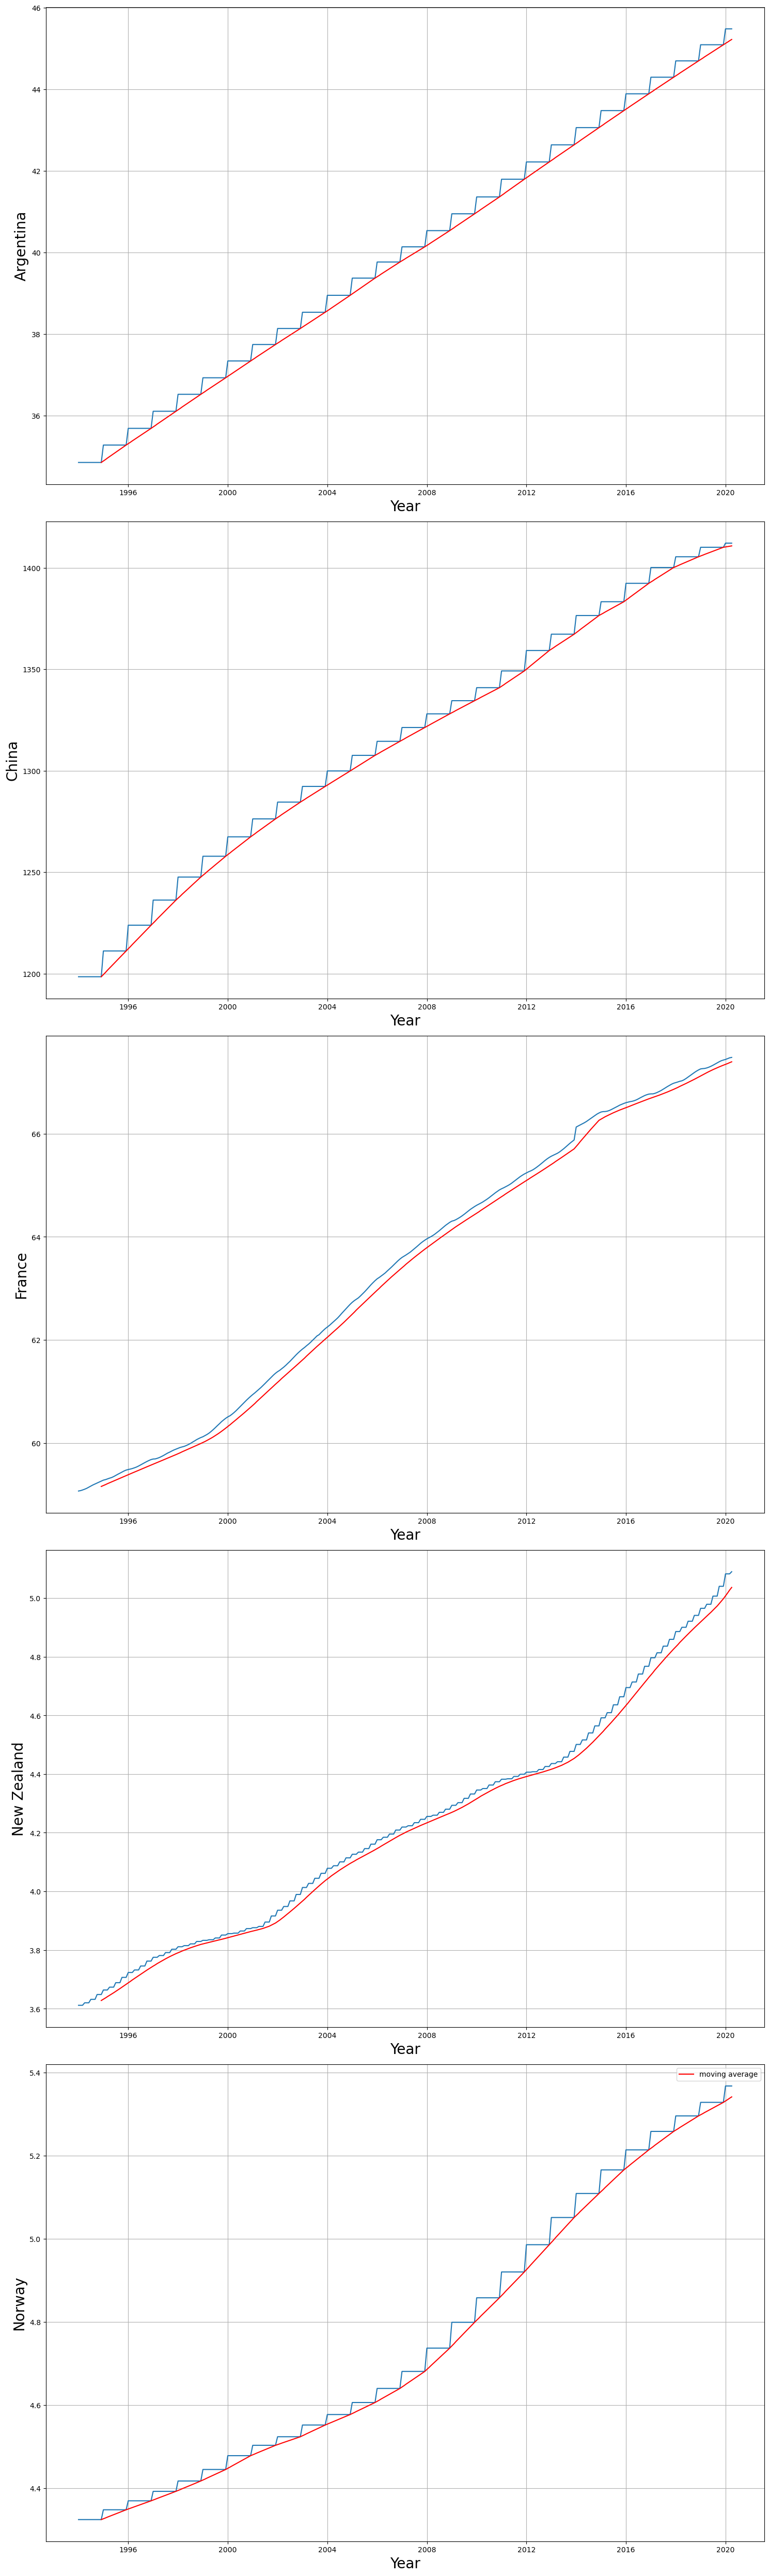

In [71]:
def plot_pop_series(df):
    # Create a subplot for each column
    rolling_mean = df.rolling(window = 12).mean()
    rolling_std = df.rolling(window = 12).std()
    fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(15, 10 * len(df.columns)))

    # Plot each column on a separate subplot
    for i, column in enumerate(df.columns):
        axes[i].plot(df.index, df[column])
        axes[i].plot(df.index, rolling_mean[column], color='red', label='moving average')
        axes[i].set_ylabel(column, fontsize=20)
        axes[i].set_xlabel('Year', fontsize=20)
        axes[i].grid()

    print("Montly Evolution of Population (in millions)")
    # Adjust spacing between subplots
    plt.tight_layout()
    plt.legend()
    plt.show()
    
plot_pop_series(monthly_pop_data)

We note that the evolution of the population of each country have a positive trend 

Moreover, we can see that for Argentina, China, New Zealand, Norway have a high degree of seasonality (a pattern that repeats itself over time).

The period of the seasonality seems to one year because the pattern repeats itself every year.

As a result, we assume that for some months that follow, the previous month's value is duplicated in the previous month.

This is probably due to the dataset we're using, as suppliers certainly didn't have the ability to retrieve sufficiently granular data (i.e. monthly data).

Overall, our times series seem to be trending upwards with positive drift.

In conclusion we can say that, our time seriesshows a strong increasing trend, with strong seasonality.

## Decompose the Monthly series
### Monthly Times series decomposition

We will decompose each series separately and analyze the different components.

The time series can be decompose with the following 3 components:


**Trend:** The trend component represents the long-term, systematic, and often nonlinear movement in the data over time. It captures the underlying direction in the time series, whether it's increasing, decreasing, or remaining relatively constant. Trends can be caused by various factors, such as economic growth, population changes, or technological advancements. A time series with a clear trend component may exhibit a consistent upward or downward movement, which is not related to short-term fluctuations or seasonality.

**Seasonality:** Seasonality refers to the regular, repeating patterns in the data that occur at fixed intervals. These intervals can be daily, weekly, monthly, quarterly, or any other specific time frame. Seasonality is often associated with external factors, such as the calendar (e.g., holidays), weather, or cultural events. Time series with seasonality will show periodic patterns that repeat within a particular time frame.

**Residuals:** The residual component, also known as the irregular component, represents the unexplained or random variation in the time series that cannot be attributed to the trend or seasonality. It includes noise, unexpected events, and other random factors. Residuals are essentially what remains after removing the trend and seasonality components. Analyzing the residuals is important because they contain valuable information about the inherent uncertainty and unpredictability in the data.


$$Y =levels + trends + seasonality + noise$$

To decompose the series we choose the following period = 12

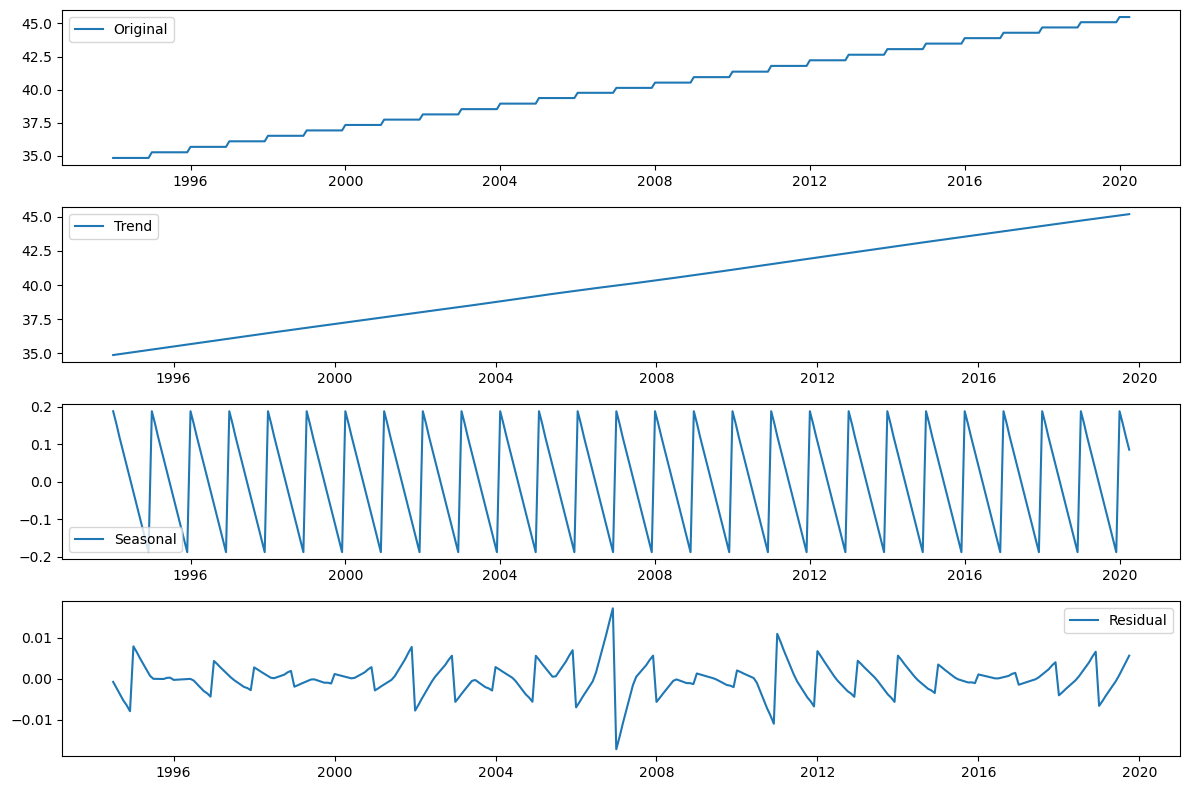

------------------------
Are the Residuals a WN ?
------------------------
Residuals is NOT a WN


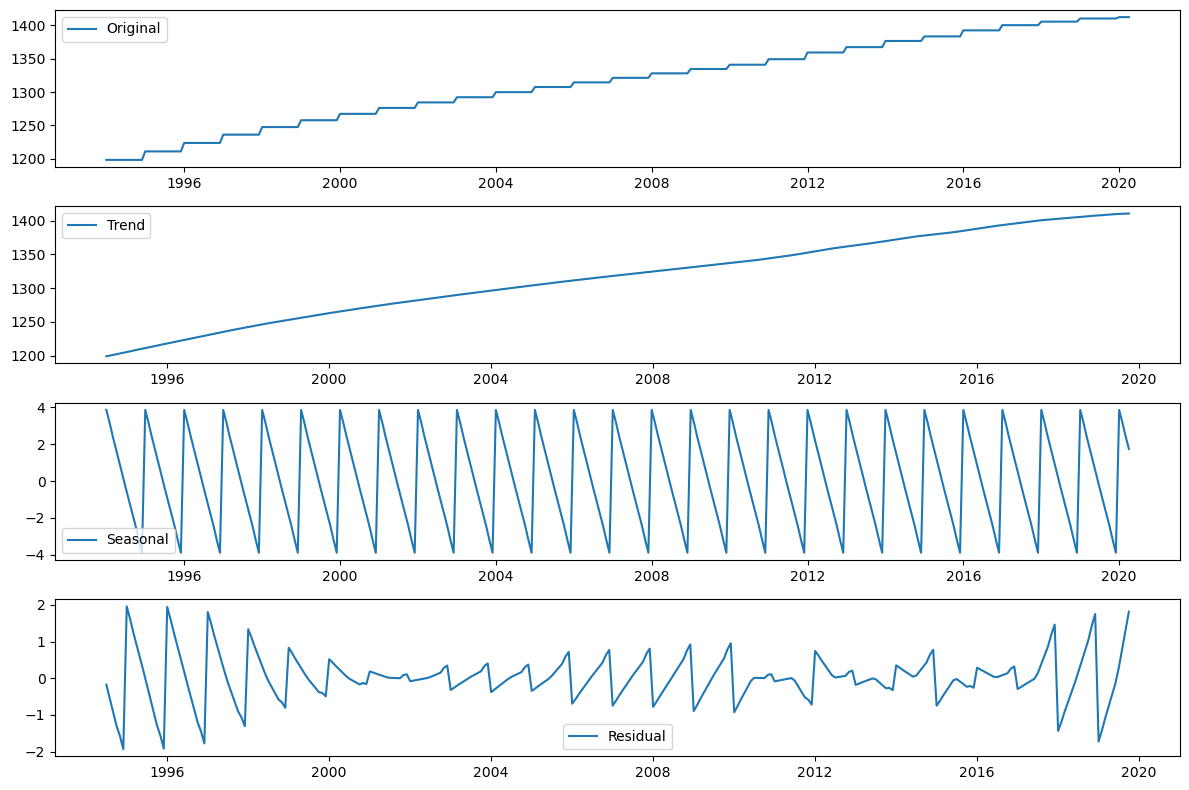

------------------------
Are the Residuals a WN ?
------------------------
Residuals is NOT a WN


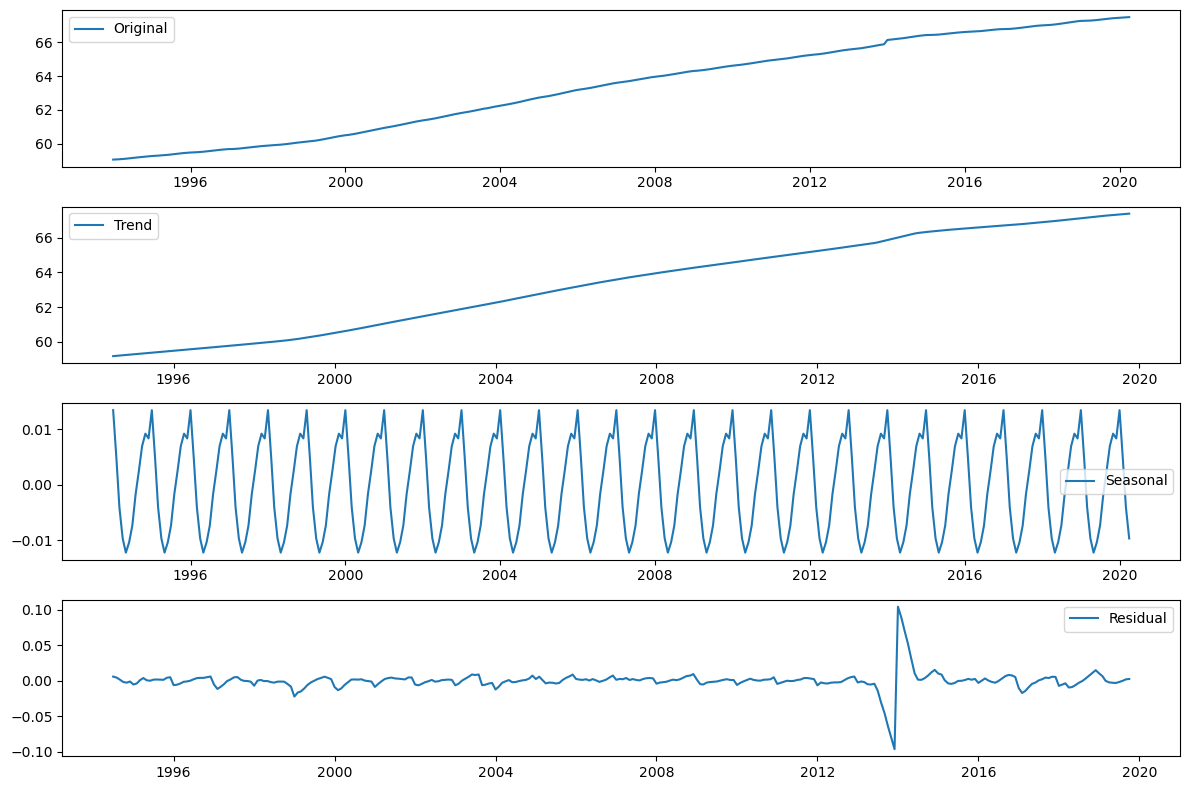

------------------------
Are the Residuals a WN ?
------------------------
Residuals is NOT a WN


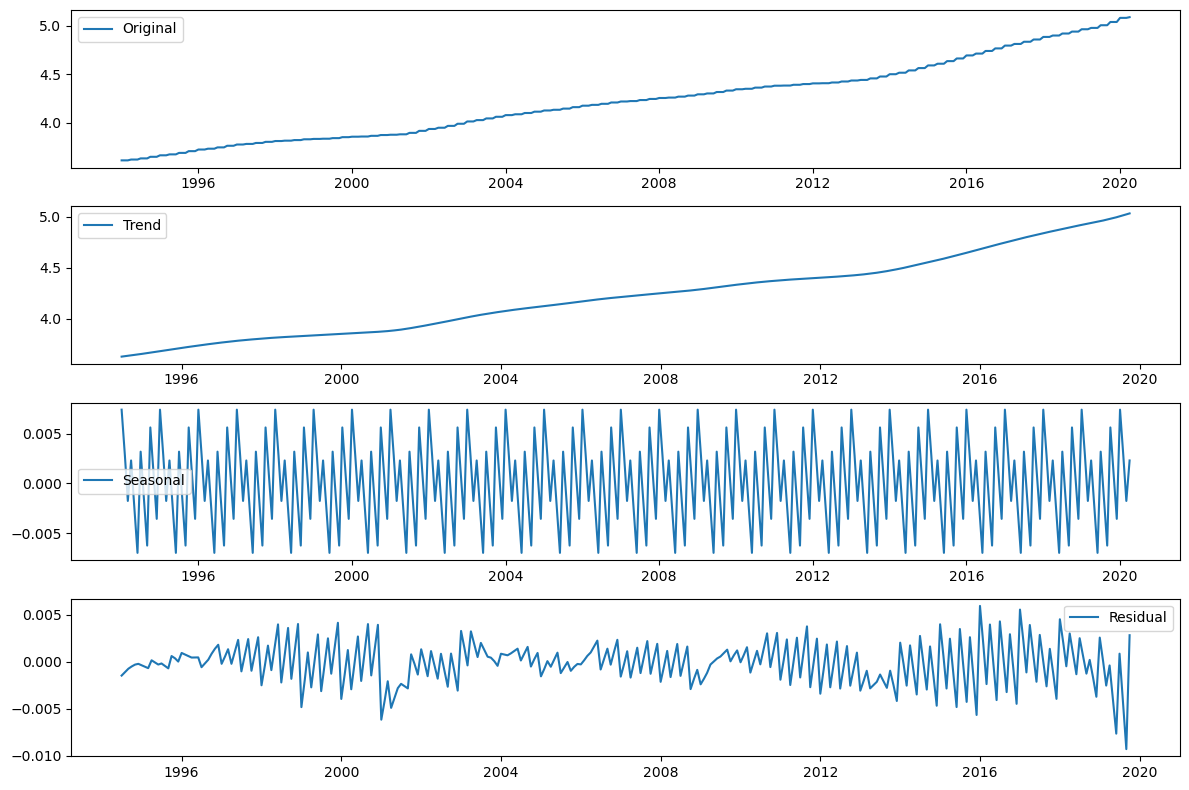

------------------------
Are the Residuals a WN ?
------------------------
Residuals is NOT a WN


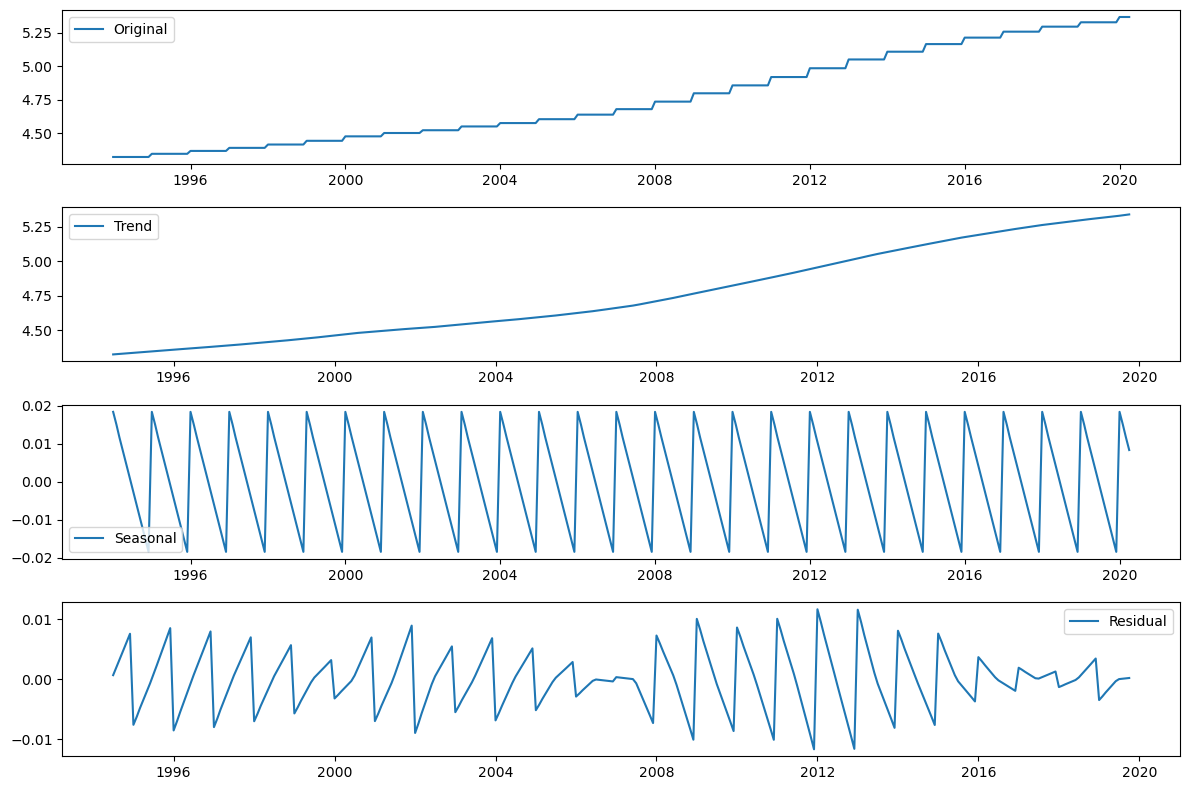

------------------------
Are the Residuals a WN ?
------------------------
Residuals is NOT a WN


In [13]:
def serie_decompositon(serie, n_period = 12):
    result = seasonal_decompose(serie, model='additive')

    # Extract components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Plot the components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(serie, label='Original')
    plt.legend()
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend()
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    trend = pd.DataFrame(trend)
    seasonal = pd.DataFrame(seasonal)
    residuals = pd.DataFrame(residual)
    print("------------------------")
    print("Are the Residuals a WN ?")
    print("------------------------")
    adf = adfuller(serie, regression = "ct")
    if adf[0] < adf[4]['5%']:
        print("Residuals is a WN")
    else :
        print("Residuals is NOT a WN")  

serie_decompositon(monthly_pop_data["Argentina"])
serie_decompositon(monthly_pop_data["China"])
serie_decompositon(monthly_pop_data["France"])
serie_decompositon(monthly_pop_data["New Zealand"])
serie_decompositon(monthly_pop_data["Norway"])

#### Analyzing trend
From the diagrams we can easily interpret that there is an upward trend for the evoluation population for each country

#### Analysing Seasonality
From the above graph, it is clear that there is a spike at the starting of every year.

#### Detrending time series

In [14]:
monthly_pop_data_untrend = monthly_pop_data - monthly_pop_data.rolling(12).mean()
monthly_pop_data_untrend.dropna(inplace=True)
monthly_pop_data_untrend

Argentina      China    France  New Zealand    Norway
Month                                                            
1994-12-01   0.000000   0.000000  0.104250     0.020400  0.000000
1995-01-01   0.391375  11.650833  0.104667     0.031450  0.021629
1995-02-01   0.355795  10.591667  0.096917     0.027100  0.019663
1995-03-01   0.320216   9.532500  0.092083     0.022750  0.017696
1995-04-01   0.284636   8.473333  0.089250     0.028000  0.015730
...               ...        ...       ...          ...       ...
2019-12-01   0.000000   0.000000  0.099500     0.042450  0.000000
2020-01-01   0.357158   1.870000  0.096167     0.075058  0.036087
2020-02-01   0.324689   1.700000  0.095083     0.065267  0.032807
2020-03-01   0.292220   1.530000  0.093917     0.055475  0.029526
2020-04-01   0.259751   1.360000  0.084917     0.053625  0.026245

[305 rows x 5 columns]

Montly Evolution of Population (in millions)


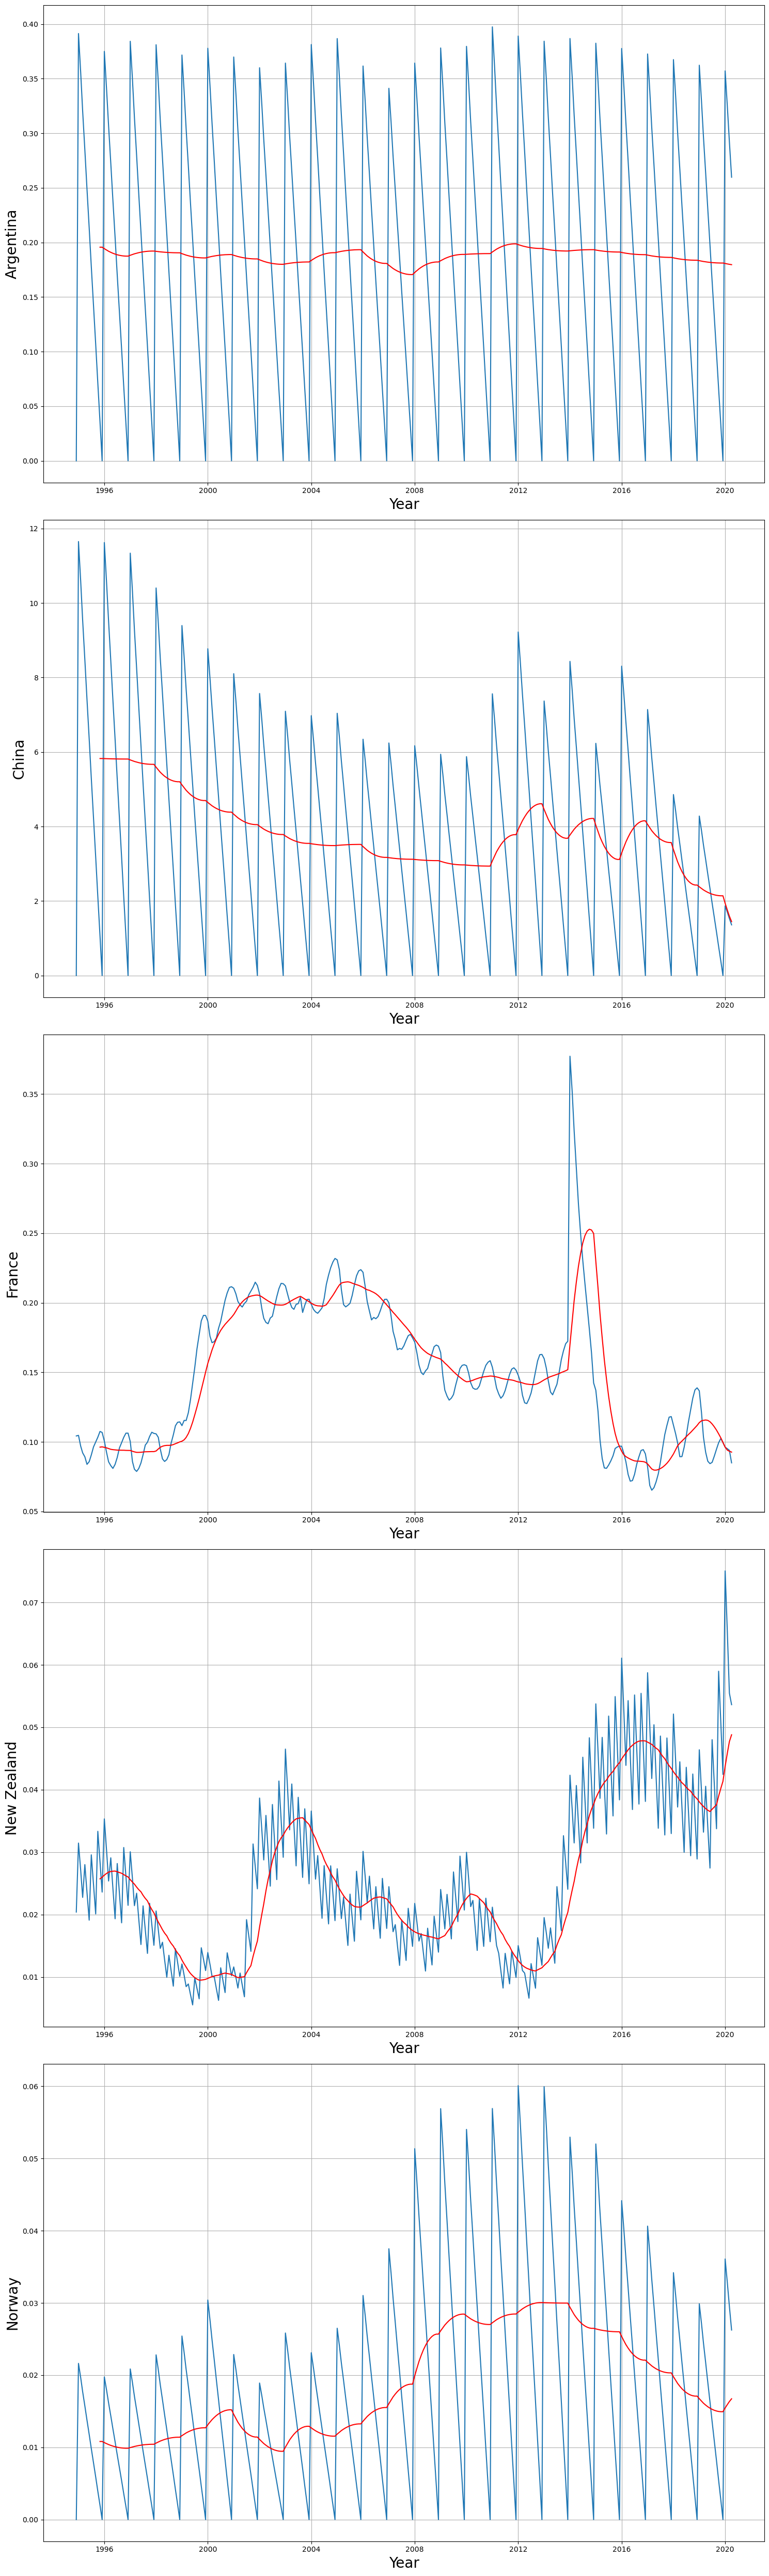

In [15]:
plot_pop_series(monthly_pop_data_untrend)

### Identifying seasonal data using ACF

We plot the ACF of the trendless data and can clearly see that there is a 12-step seasonal period.

In [16]:
def plot_acf_pacf(series):
    # Plot ACF and PACF for each time series
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 20))

    for i, col in enumerate(series.columns):
        ax1 = axes[i, 0]
        ax2 = axes[i, 1]

        # Plot ACF
        plot_acf(series[col], lags=[12, 24, 36, 48, 60, 72], ax=ax1)
        ax1.set_title(f'ACF - {col}')

        # Plot PACF
        plot_pacf(series[col], lags=[12, 24, 36, 48, 60, 72], ax=ax2)
        ax2.set_title(f'PACF - {col}')

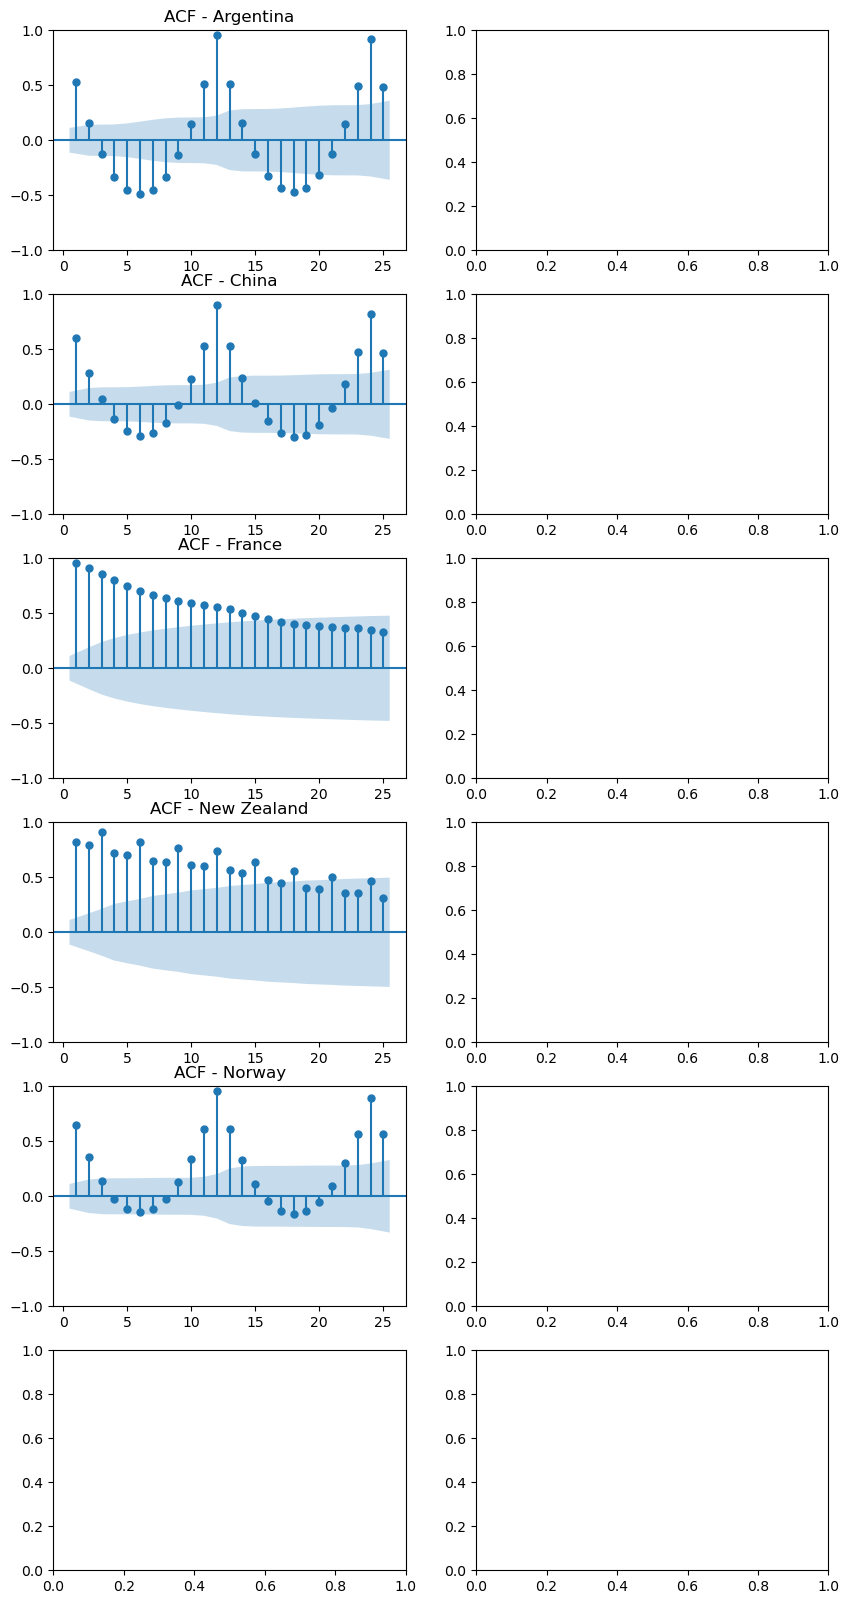

In [17]:
def plot_acf_trendless(series):
    # Plot ACF and PACF for each time series
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 20))

    for i, col in enumerate(series.columns):
        ax1 = axes[i, 0]
        ax2 = axes[i, 1]

        # Plot ACF
        plot_acf(series[col], lags=25, ax=ax1, zero=False)
        ax1.set_title(f'ACF - {col}')

plot_acf_trendless(monthly_pop_data_untrend)

The ACF for Argentina, China, Norway and United States shows that there is a seasonal component (we see a peak at lag 12). Including this information will improve our predictions. Indeed, the time period of the seasonal component of these data is 12.

Otherwise the time series for New Zealand and France don't seem to include a seasonal pattern contrary to what we said previously

Hence, we have to deal with seasonal time series for the following country :
- Argentina 
- China
- United States

Hence, we have to deal with non seasonal time series for the following country:
- France
- New Zealand

### Check for the stationnarity

To check for the stationnarity of population time series

To do so we, we assumme that the time series has a deterministic constant offset and a linear trend

We well perform an ADF test in order to test the presence of an unit root for each series.

To do so we consider the following hypothesis in the right order:


$\Delta X_t = b_0 + \rho X_{t-1} + \sum_{j=1}^{p-1} \phi_j \delta X_{t-j}+\epsilon_t$

**REGRESSION: CONSTANT AND TREND**
By performing this test, we assummes that the time series has a deterministic constant offset and a linear trend

Test for deterministic trend:
* $H_0:$ The trend coefficient is not signiciant ($b_1=0$)
* $H_1:$ The trend coefficient is signiciant ($b_1 \neq 0$)

If $H_0$ is rejected we accept $H1$ and check the presence of unit root
Test for unit root with trend:
* $H_0$: There is a unit root (i.e. $\rho \neq 0$ non stationarity) with a significant trend. The time series is non-stationary with deterministic trend.
* $H_1$: There is no unit root (i.e. $\rho = 0$ stationarity) no stochastic trend but a determistic trend.

In [18]:
def adf_test(series):
    """
    ADFULLER Parameter
    -'c' : constant only (default) (random-walk with a drift)
    -'ct' : constant and trend. (both series could have been trend stationary)
    -'ctt' : constant, and linear and quadratic trend.
    -'n' : no constant, no trend (random walk)
    For example:
    - imposing 'n' to regression mean that we assume a random walk
    - imposing 'c' means you assume a random walk with a drift
    """
          
    ## ADF test  ##
    result = adfuller(series, regression='ct')  # 'ct' for a constant and trend terms
    # Extract ADF test statistics and p-value
    p_value = result[1]
    print("p_value: ", p_value)
    if p_value <= 0.05:
        print("Reject the null hypothesis. The time series is likely stationary.")
    else:
        print("Fail to reject the null hypothesis. The time series may be non-stationary.")

        
print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("MONTHLY ARGENTINA")
print("______________________________")
adf_test(monthly_pop_data["Argentina"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("MONTHLY CHINA")
print("______________________________")
adf_test(monthly_pop_data["China"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("MONTHLY FRANCE")
print("______________________________")
adf_test(monthly_pop_data["France"])

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("MONTHLY NEW ZEALAND")
print("______________________________")
adf_test(monthly_pop_data["New Zealand"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("MONTHLY NORWAY")
print("______________________________")
adf_test(monthly_pop_data["Norway"])
print("")

______________________________
REGRESSION : CONSTANT AND TREND
MONTHLY ARGENTINA
______________________________
p_value:  0.2050128571200785
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
MONTHLY CHINA
______________________________
p_value:  0.9508555869736202
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
MONTHLY FRANCE
______________________________
p_value:  0.8824406444151902
Fail to reject the null hypothesis. The time series may be non-stationary.
______________________________
REGRESSION : CONSTANT AND TREND
MONTHLY NEW ZEALAND
______________________________
p_value:  0.9905738775626189
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
MONTHLY NORWAY
______________________________
p_value:  0.13617349352904162

We can see that our series seems to be non-stationary. This is consistent with our plot.

### Seasonal differencing

We will nos focus on seasonal time series (Argentina, China, Norway)

There are many transformations we can apply to a time series to make a seasonal time series to stationary time series. 

As we now that our time series have seasonal pattern and upward trend, we will try this following techniques:
- substract with moving average
- substract the time series value of one season ago.

In [19]:
def get_stationarity(timeseries):
    plt.figure(figsize=(12, 8))
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moving Average')
    std = plt.plot(rolling_std, color='black', label='Moving standard deviation')
    plt.legend(loc='best')
    plt.title("Stationarity Test")
    plt.show(block=False)
    
    adf_test(timeseries)

### 1st Technique : Subtract with the moving average

In [20]:
rolling_mean = monthly_pop_data.rolling(window=12).mean()
monthly_pop_data_minus_mean =  monthly_pop_data - rolling_mean
monthly_pop_data_minus_mean.dropna(inplace = True)
monthly_pop_data_minus_mean

Argentina      China    France  New Zealand    Norway
Month                                                            
1994-12-01   0.000000   0.000000  0.104250     0.020400  0.000000
1995-01-01   0.391375  11.650833  0.104667     0.031450  0.021629
1995-02-01   0.355795  10.591667  0.096917     0.027100  0.019663
1995-03-01   0.320216   9.532500  0.092083     0.022750  0.017696
1995-04-01   0.284636   8.473333  0.089250     0.028000  0.015730
...               ...        ...       ...          ...       ...
2019-12-01   0.000000   0.000000  0.099500     0.042450  0.000000
2020-01-01   0.357158   1.870000  0.096167     0.075058  0.036087
2020-02-01   0.324689   1.700000  0.095083     0.065267  0.032807
2020-03-01   0.292220   1.530000  0.093917     0.055475  0.029526
2020-04-01   0.259751   1.360000  0.084917     0.053625  0.026245

[305 rows x 5 columns]

______________________________
REGRESSION : CONSTANT AND TREND
ARGENTINA
______________________________


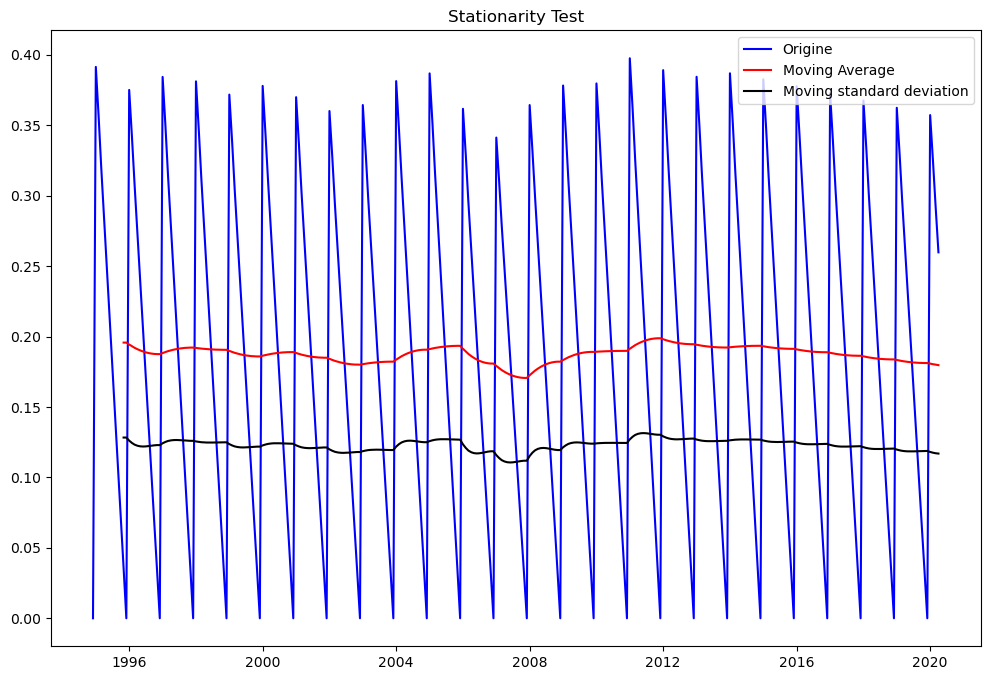

p_value:  0.08105968903521399
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
CHINA
______________________________


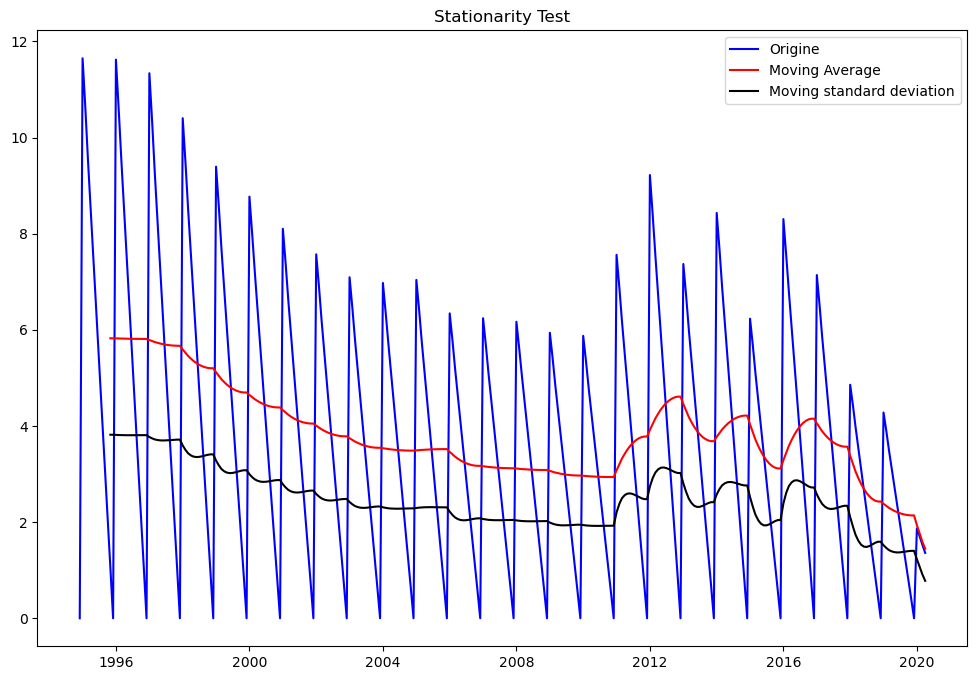

p_value:  0.604746376021833
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NORWAY
______________________________


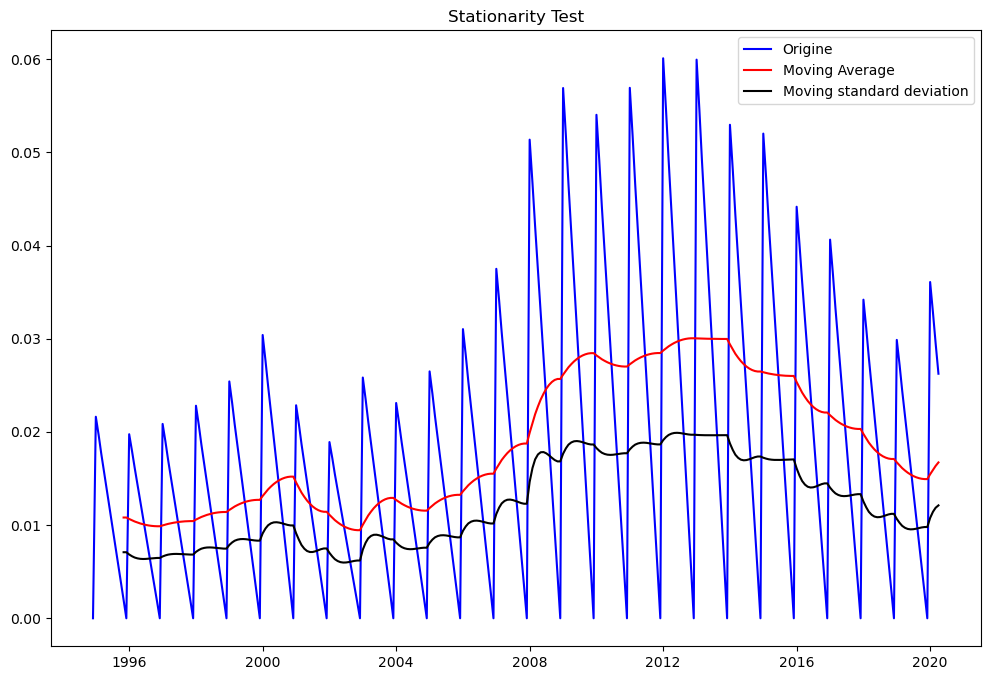

p_value:  0.8954879730429677
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NEW ZEALAND
______________________________


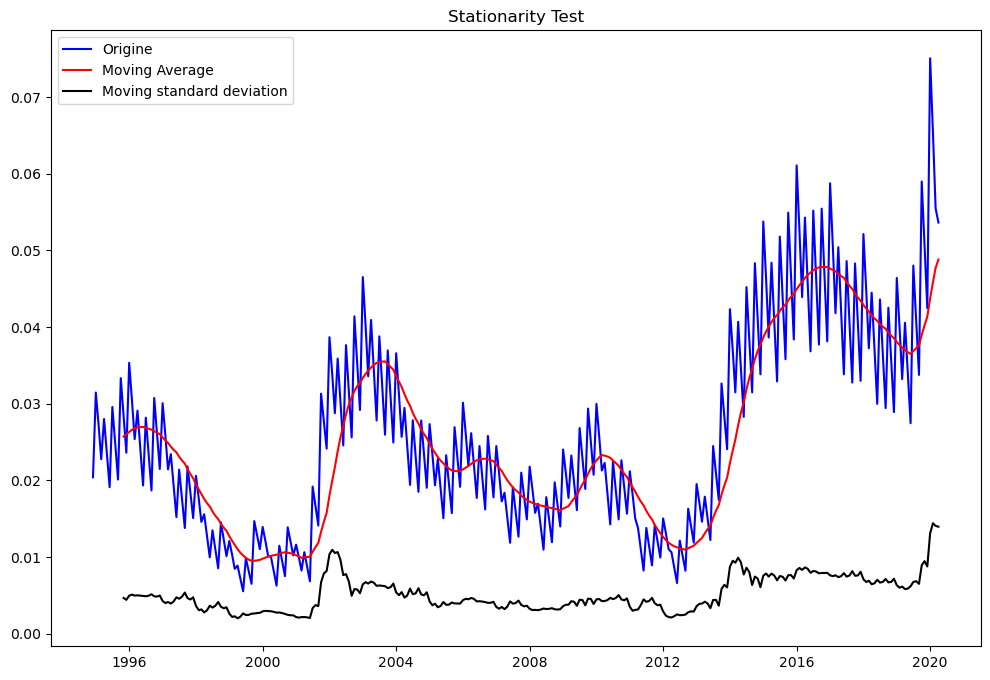

p_value:  0.37143977747700624
Fail to reject the null hypothesis. The time series may be non-stationary.


In [21]:
print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("ARGENTINA")
print("______________________________")
get_stationarity(monthly_pop_data_minus_mean["Argentina"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("CHINA")
print("______________________________")
get_stationarity(monthly_pop_data_minus_mean["China"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("NORWAY")
print("______________________________")
get_stationarity(monthly_pop_data_minus_mean["Norway"])
print("")

We can see that with this 1st technique of difference, our series remain non-stationary.

### 2nd technique : Substract of one season ago.

$\Delta_{y_{t}} = y_{t} - y_{t-S}$

To do so I remove the seasonal pattern of seasonal timeseries by substracting one season ago (12 months)

In [22]:
monthly_pop_data_1st_diff = monthly_pop_data.diff(12).dropna()
monthly_pop_data_1st_diff

Argentina  China  France  New Zealand    Norway
Month                                                      
1995-01-01   0.426954  12.71   0.211       0.0522  0.023595
1995-02-01   0.426954  12.71   0.213       0.0522  0.023595
1995-03-01   0.426954  12.71   0.214       0.0522  0.023595
1995-04-01   0.426954  12.71   0.214       0.0534  0.023595
1995-05-01   0.426954  12.71   0.209       0.0534  0.023595
...               ...    ...     ...          ...       ...
2019-12-01   0.395293   4.67   0.192       0.0992  0.032593
2020-01-01   0.389627   2.04   0.184       0.1175  0.039368
2020-02-01   0.389627   2.04   0.193       0.1175  0.039368
2020-03-01   0.389627   2.04   0.206       0.1175  0.039368
2020-04-01   0.389627   2.04   0.204       0.1110  0.039368

[304 rows x 5 columns]

### Let's run ADF test after taking the first difference

______________________________
REGRESSION : CONSTANT AND TREND
ARGENTINA
______________________________


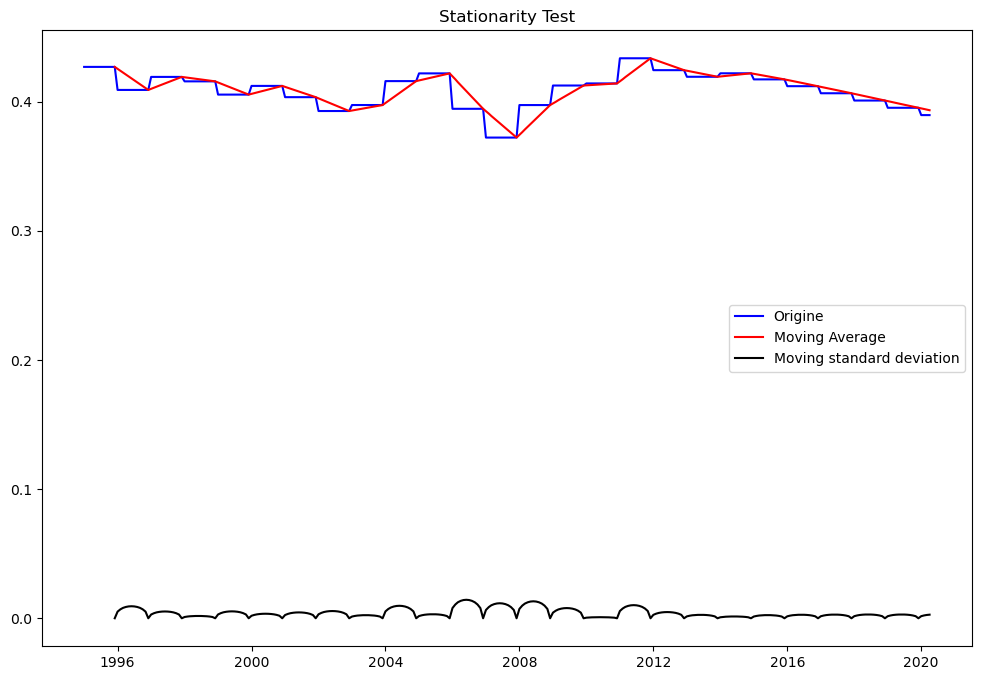

p_value:  0.4096193499176296
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
CHINA
______________________________


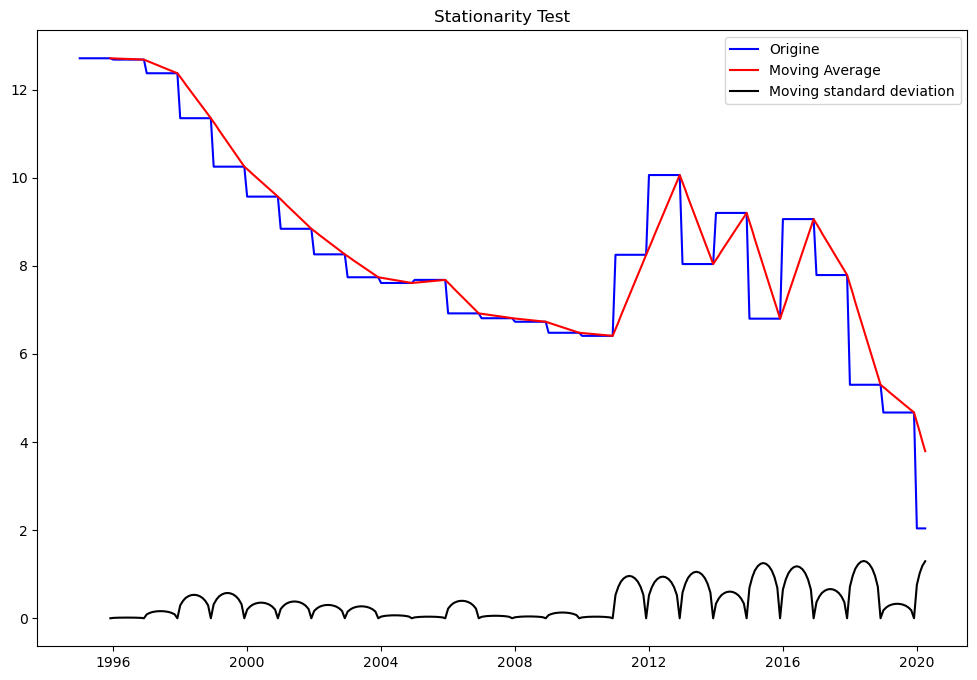

p_value:  0.7895296468479638
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NORWAY
______________________________


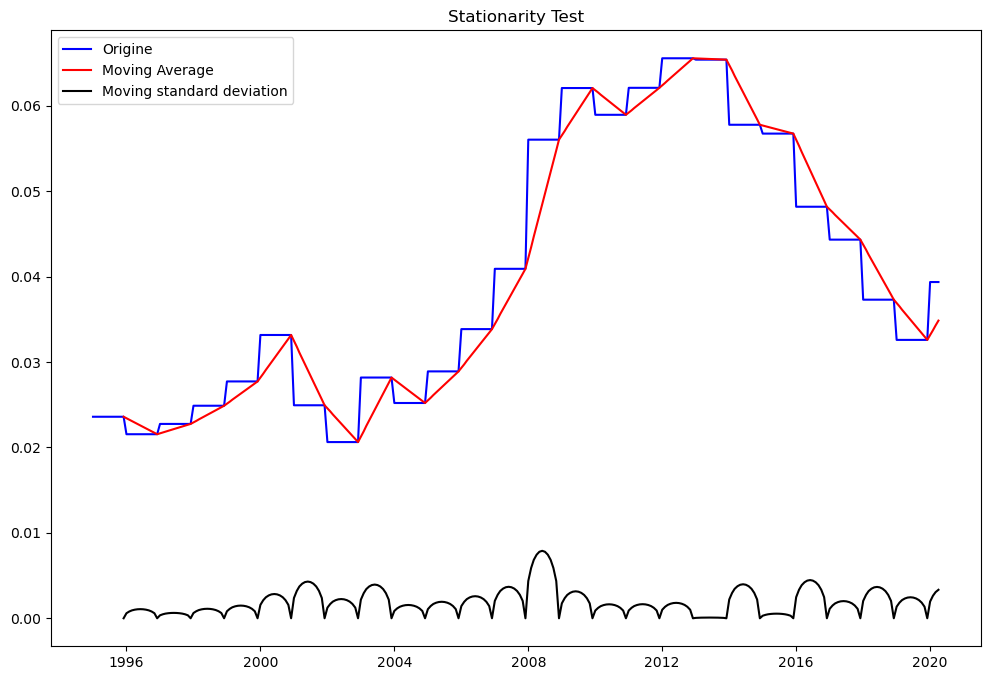

p_value:  0.8443174854545736
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NEW ZEALAND
______________________________


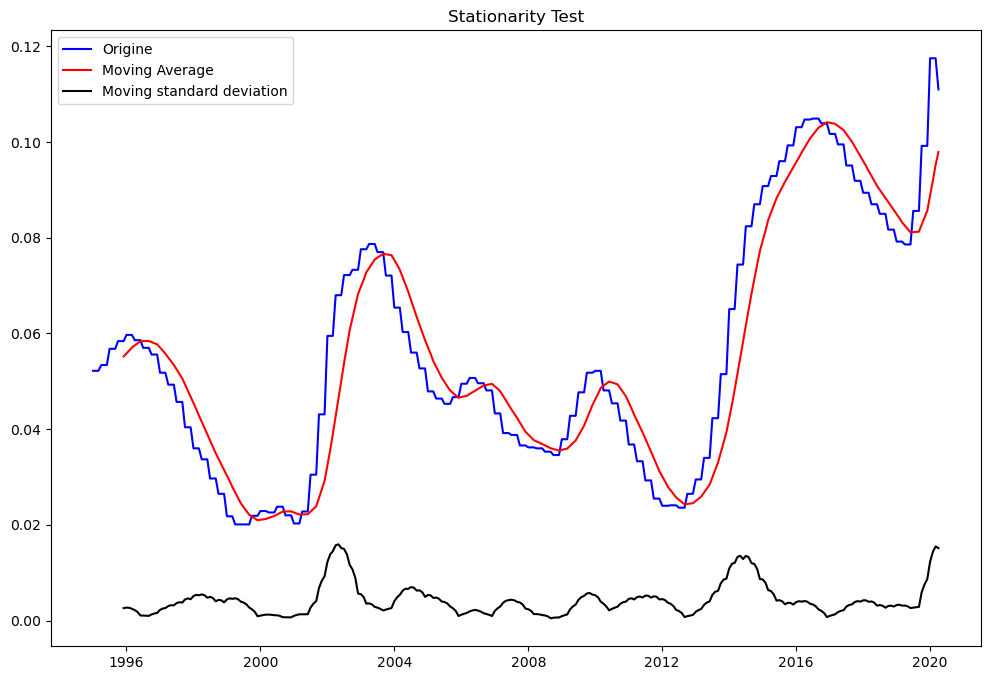

p_value:  0.11101824980024733
Fail to reject the null hypothesis. The time series may be non-stationary.


In [23]:
print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("ARGENTINA")
print("______________________________")
get_stationarity(monthly_pop_data_1st_diff["Argentina"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("CHINA")
print("______________________________")
get_stationarity(monthly_pop_data_1st_diff["China"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("NORWAY")
print("______________________________")
get_stationarity(monthly_pop_data_1st_diff["Norway"])
print("")

We can see that after traking the first difference with this second technique all the time series seems to be non-stationary.

Therefore, we have to take the second difference.

### Let's take the second difference to transform our non-stationary series into stationary series

In [24]:
monthly_pop_data_2nd_diff = monthly_pop_data.diff().diff(12).dropna()
monthly_pop_data_2nd_diff

Argentina  China        France  New Zealand    Norway
Month                                                            
1995-02-01   0.000000   0.00  2.000000e-03       0.0000  0.000000
1995-03-01   0.000000   0.00  1.000000e-03       0.0000  0.000000
1995-04-01   0.000000   0.00  7.105427e-15       0.0012  0.000000
1995-05-01   0.000000   0.00 -5.000000e-03       0.0000  0.000000
1995-06-01   0.000000   0.00 -4.000000e-03       0.0000  0.000000
...               ...    ...           ...          ...       ...
2019-12-01   0.000000   0.00 -1.000000e-02       0.0000  0.000000
2020-01-01  -0.005666  -2.63 -8.000000e-03       0.0183  0.006775
2020-02-01   0.000000   0.00  9.000000e-03       0.0000  0.000000
2020-03-01   0.000000   0.00  1.300000e-02       0.0000  0.000000
2020-04-01   0.000000   0.00 -2.000000e-03      -0.0065  0.000000

[303 rows x 5 columns]

### Let's run ADF test after taking the 2nd difference

______________________________
REGRESSION : CONSTANT AND TREND
ARGENTINA
______________________________


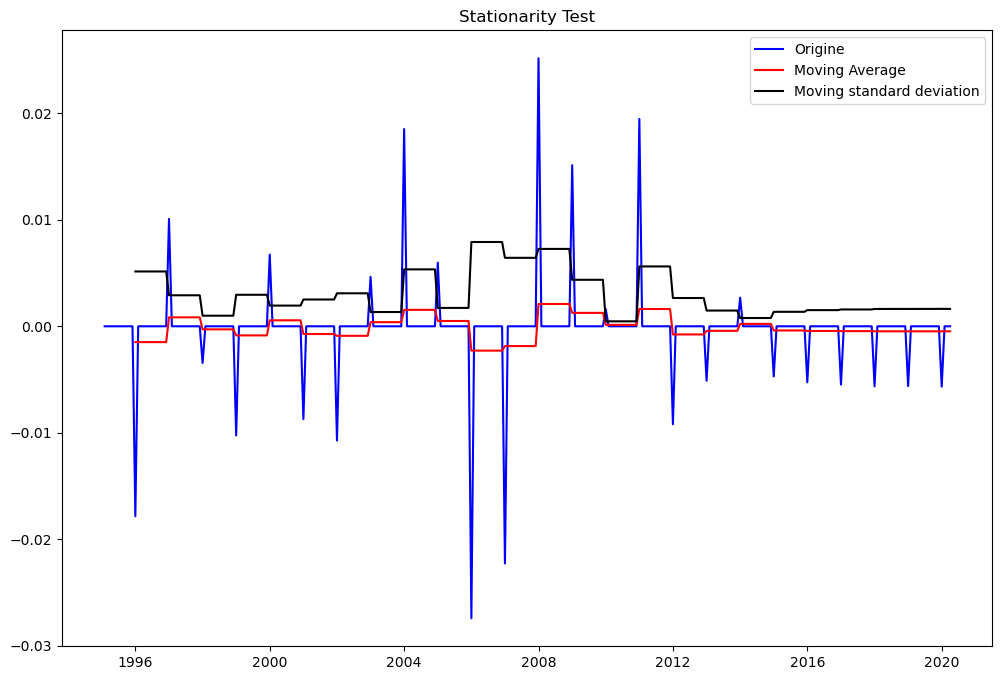

p_value:  0.0
Reject the null hypothesis. The time series is likely stationary.

______________________________
REGRESSION : CONSTANT AND TREND
CHINA
______________________________


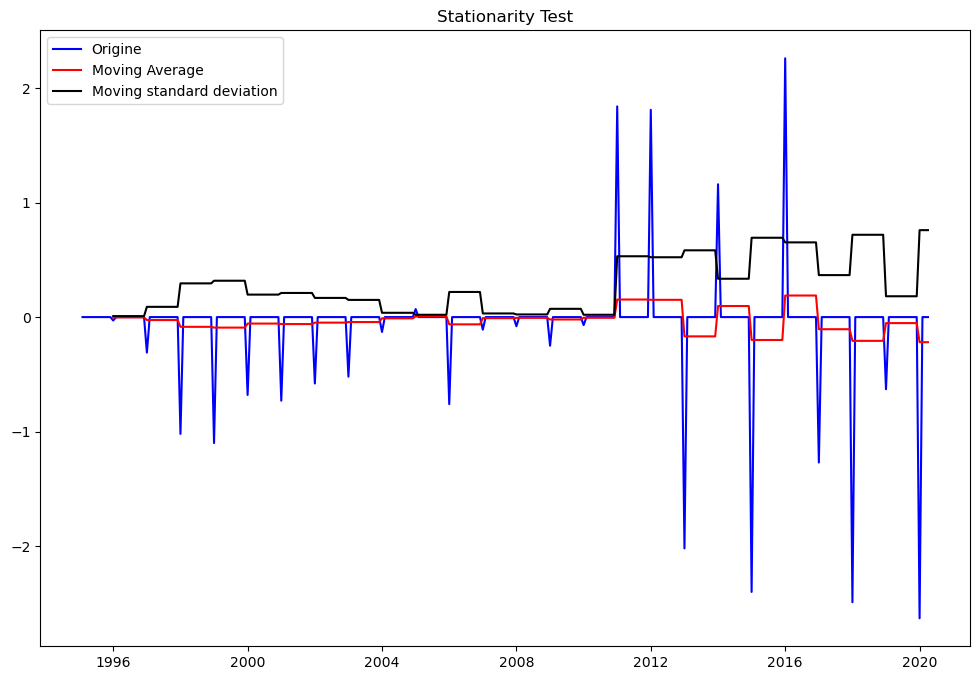

p_value:  0.0
Reject the null hypothesis. The time series is likely stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NORWAY
______________________________


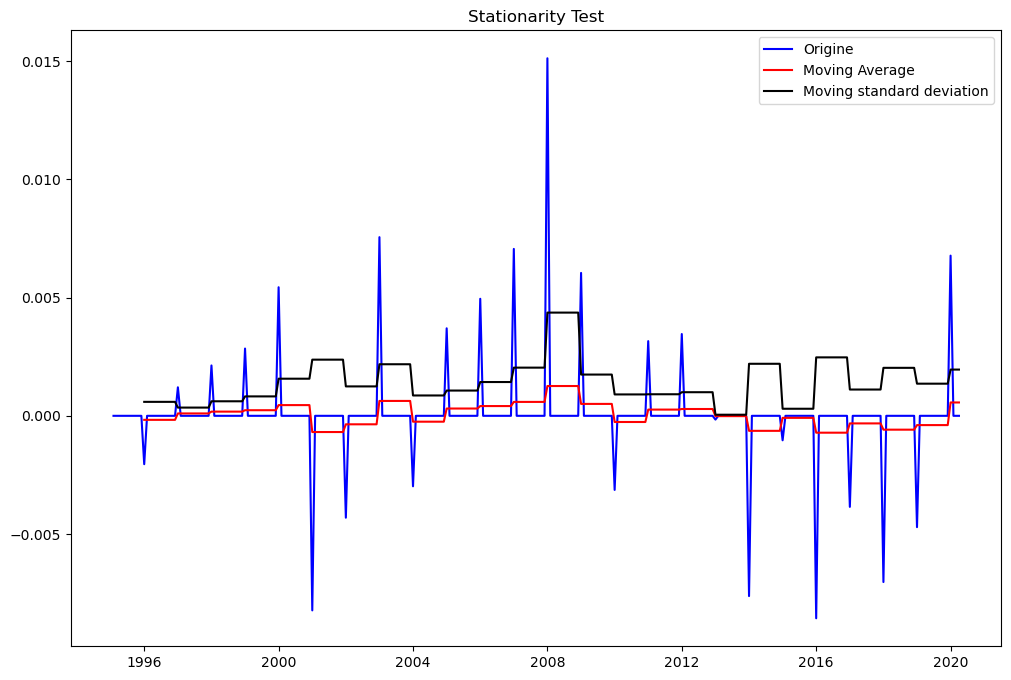

p_value:  0.03904776221086778
Reject the null hypothesis. The time series is likely stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NEW ZEALAND
______________________________


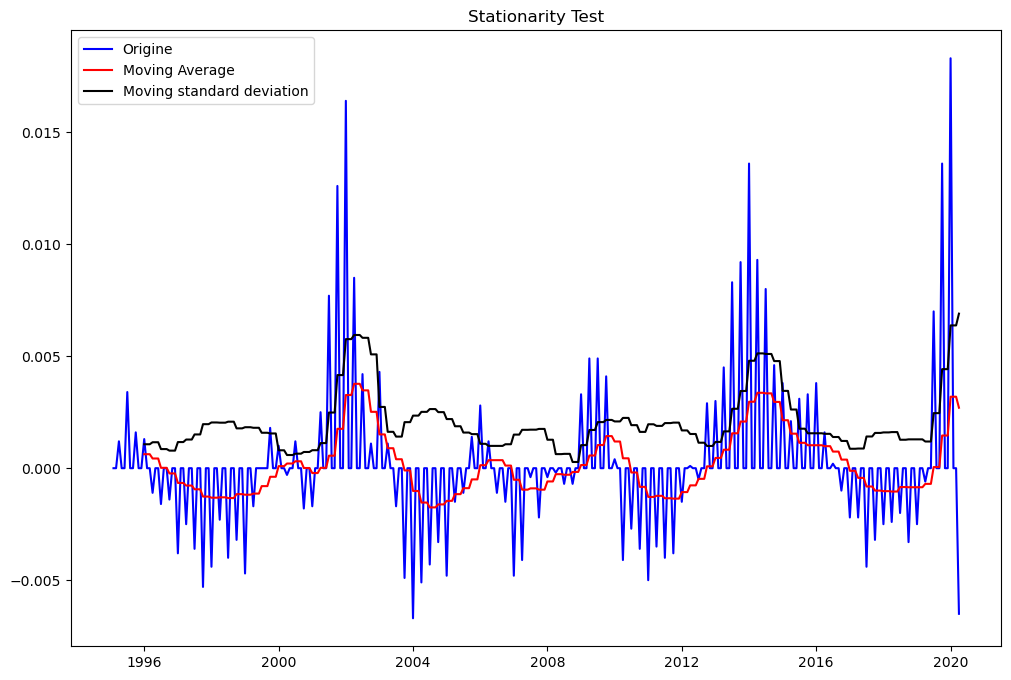

p_value:  0.0013866608475173964
Reject the null hypothesis. The time series is likely stationary.


In [25]:
print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("ARGENTINA")
print("______________________________")
get_stationarity(monthly_pop_data_2nd_diff["Argentina"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("CHINA")
print("______________________________")
get_stationarity(monthly_pop_data_2nd_diff["China"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("NORWAY")
print("______________________________")
get_stationarity(monthly_pop_data_2nd_diff["Norway"])
print("")

After taking the second difference we can see that the series are now stationary

### Non-seasonal differencing

In [26]:
monthly_pop_data_1st_non_seasonal = monthly_pop_data.diff()
monthly_pop_data_1st_non_seasonal.dropna(inplace=True)
monthly_pop_data_1st_non_seasonal

Argentina  China  France  New Zealand    Norway
Month                                                      
1994-02-01   0.000000   0.00   0.008       0.0000  0.000000
1994-03-01   0.000000   0.00   0.012       0.0000  0.000000
1994-04-01   0.000000   0.00   0.015       0.0085  0.000000
1994-05-01   0.000000   0.00   0.017       0.0000  0.000000
1994-06-01   0.000000   0.00   0.023       0.0000  0.000000
...               ...    ...     ...          ...       ...
2019-12-01   0.000000   0.00   0.013       0.0000  0.000000
2020-01-01   0.389627   2.04   0.012       0.0424  0.039368
2020-02-01   0.000000   0.00   0.015       0.0000  0.000000
2020-03-01   0.000000   0.00   0.016       0.0000  0.000000
2020-04-01   0.000000   0.00   0.008       0.0074  0.000000

[315 rows x 5 columns]

#### Let's apply a ADF Test

______________________________
REGRESSION : CONSTANT AND TREND
FRANCE
______________________________


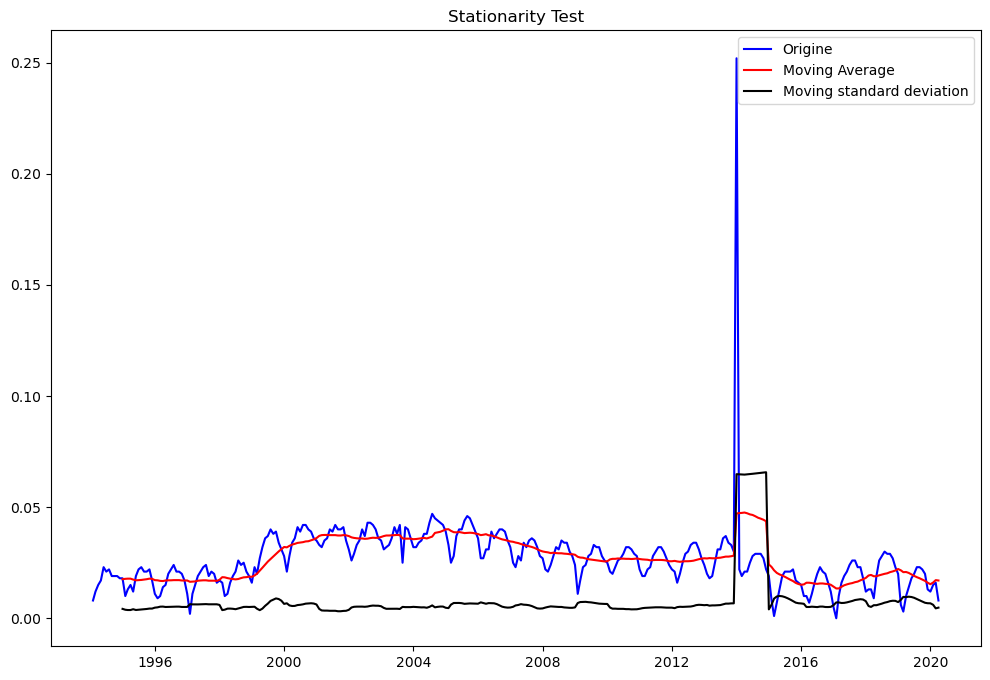

p_value:  0.3844934483380436
Fail to reject the null hypothesis. The time series may be non-stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NEW ZEALAND
______________________________


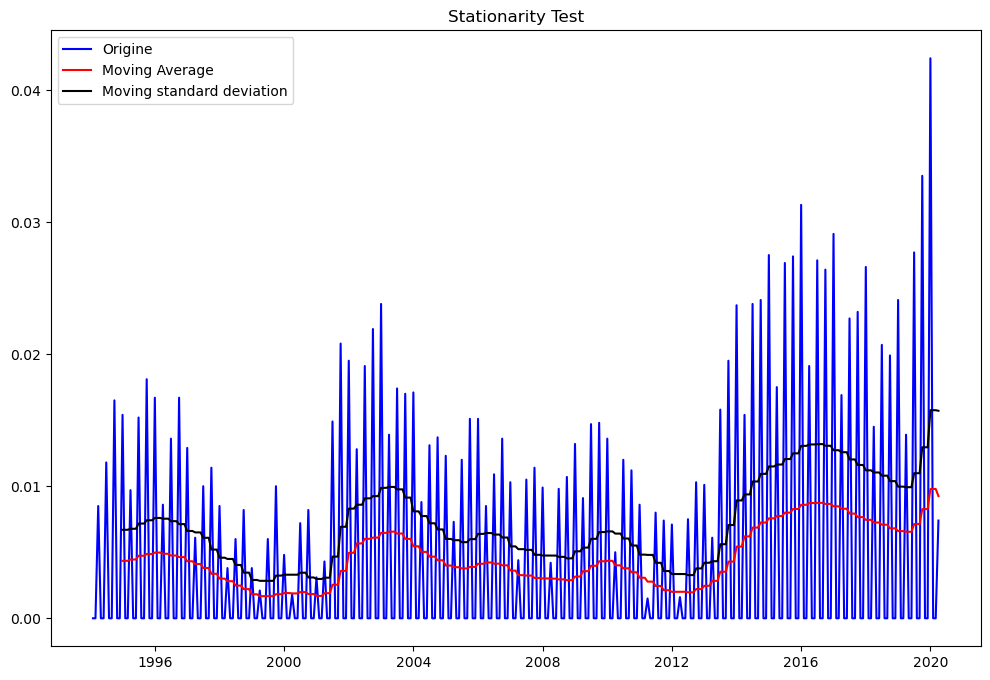

p_value:  0.08229715744449179
Fail to reject the null hypothesis. The time series may be non-stationary.



In [72]:
print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("FRANCE")
print("______________________________")
get_stationarity(monthly_pop_data_1st_non_seasonal["France"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("NEW ZEALAND")
print("______________________________")
get_stationarity(monthly_pop_data_1st_non_seasonal["New Zealand"])
print("")

After taking the 1st difference for the non seasonal time series, they remain non-stationary. We have to take the second difference.

#### Let's take the 2nd difference

In [28]:
monthly_pop_data_2nd_diff_non_seasonal = monthly_pop_data.diff().diff()
monthly_pop_data_2nd_diff_non_seasonal.dropna(inplace=True)
monthly_pop_data_2nd_diff_non_seasonal

Argentina  China  France  New Zealand    Norway
Month                                                      
1994-03-01   0.000000   0.00   0.004       0.0000  0.000000
1994-04-01   0.000000   0.00   0.003       0.0085  0.000000
1994-05-01   0.000000   0.00   0.002      -0.0085  0.000000
1994-06-01   0.000000   0.00   0.006       0.0000  0.000000
1994-07-01   0.000000   0.00  -0.002       0.0118  0.000000
...               ...    ...     ...          ...       ...
2019-12-01   0.000000   0.00  -0.007       0.0000  0.000000
2020-01-01   0.389627   2.04  -0.001       0.0424  0.039368
2020-02-01  -0.389627  -2.04   0.003      -0.0424 -0.039368
2020-03-01   0.000000   0.00   0.001       0.0000  0.000000
2020-04-01   0.000000   0.00  -0.008       0.0074  0.000000

[314 rows x 5 columns]

#### Let's ADF test

______________________________
REGRESSION : CONSTANT AND TREND
FRANCE
______________________________


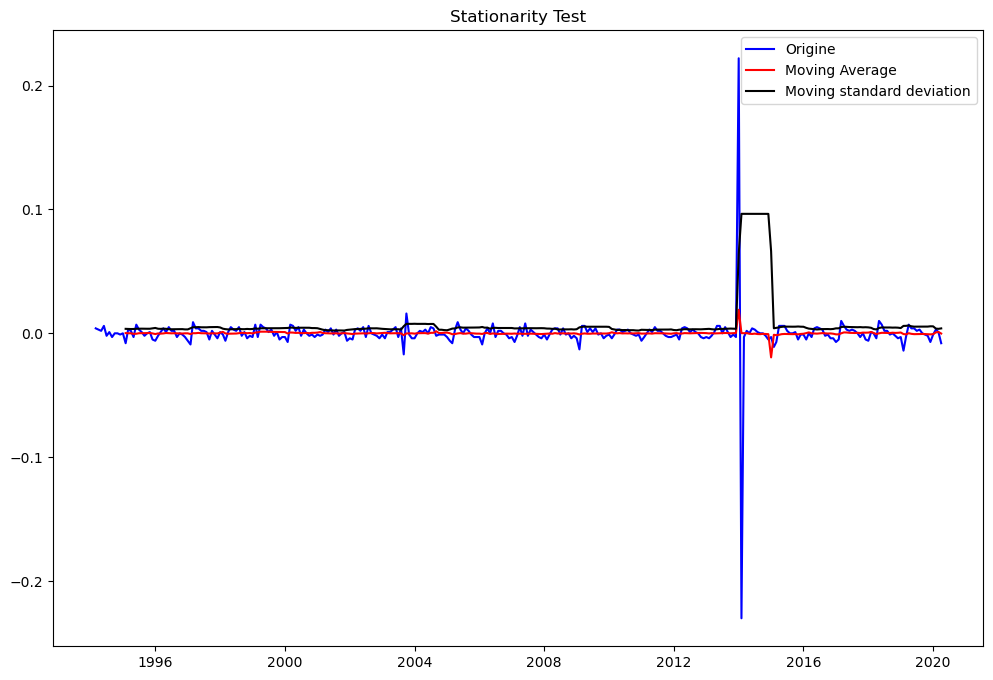

p_value:  4.258684343254334e-15
Reject the null hypothesis. The time series is likely stationary.

______________________________
REGRESSION : CONSTANT AND TREND
NEW ZEALAND
______________________________


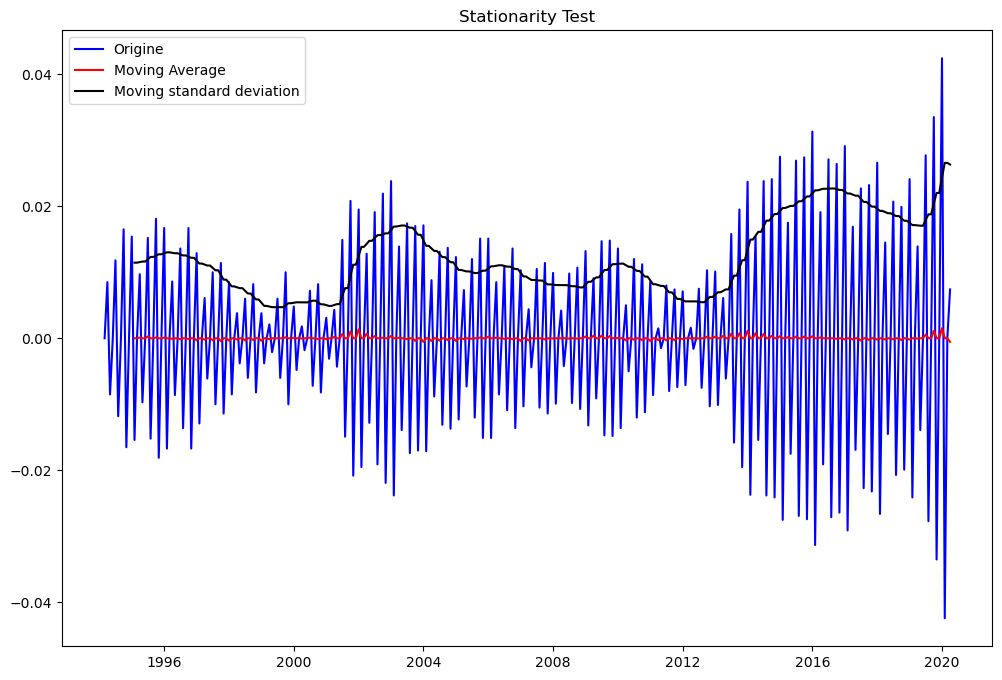

p_value:  0.0018781341441238366
Reject the null hypothesis. The time series is likely stationary.



In [73]:
print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("FRANCE")
print("______________________________")
get_stationarity(monthly_pop_data_2nd_diff_non_seasonal["France"])
print("")

print("______________________________")
print("REGRESSION : CONSTANT AND TREND")
print("NEW ZEALAND")
print("______________________________")
get_stationarity(monthly_pop_data_2nd_diff_non_seasonal["New Zealand"])
print("")

After taking the 2nd difference, the series are now stationary

### Using ACF and PACF to choose the model order

To find seasonal orders, we plot the ACF and PACF of differentiated time series.

Indeed, by comparing the ACF and PACF for a time series, we can deduce the order of the model. If the amplitude of the ACF decreases with increasing lag and the PACF cuts off after a certain lag p, then we have an AR(p) model.

If the ACF amplitude cuts off after a certain offset q and the PACF amplitude decreases, then we have an MA(q) model.

In summary:

**AR(p)**

* ACF -> Tails off
* PACF -> Cuts off after lag p

**MA(q)**

* ACF -> Cuts off after lag q
* PACF -> Tails off

**ARMA(p,q)**

* Tails off
* Tails off

We set the lags parameter to a list of offsets instead of a maximum. This traces the ACF and PACF to these specific offsets only.

#### Focus on seasonal time series

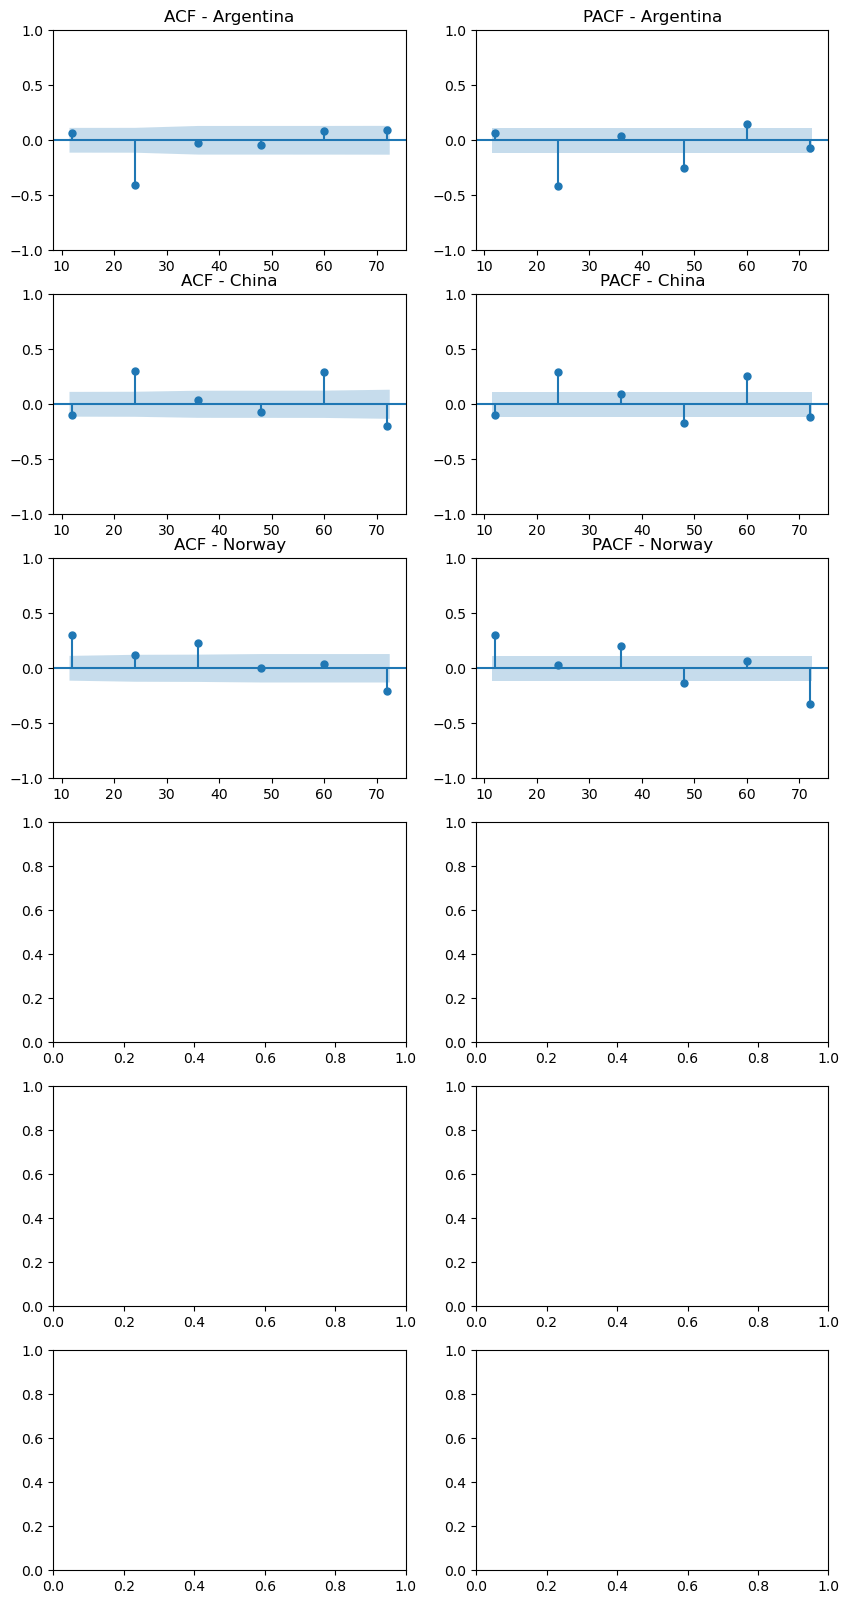

In [74]:
def plot_acf_pacf_seasonal(series):
    # Plot ACF and PACF for each time series
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20))

    for i, col in enumerate(series.columns):
        ax1 = axes[i, 0]
        ax2 = axes[i, 1]

        # Plot ACF
        plot_acf(series[col], lags=[12, 24, 36, 48, 60, 72], ax=ax1)
        ax1.set_title(f'ACF - {col}')

        # Plot PACF
        plot_pacf(series[col], lags=[12, 24, 36, 48, 60, 72], ax=ax2)
        ax2.set_title(f'PACF - {col}')
        
plot_acf_pacf(monthly_pop_data_2nd_diff[['Argentina', 'China', 'Norway']])

#### Interpreation of the ACF and PACF graph

**Argentina**
On remarque que l'autocorrélation au lag 1 est très négative, semble montrer que nous avons pris la différence trop de fois.

#### Focus on non-seasonal time series

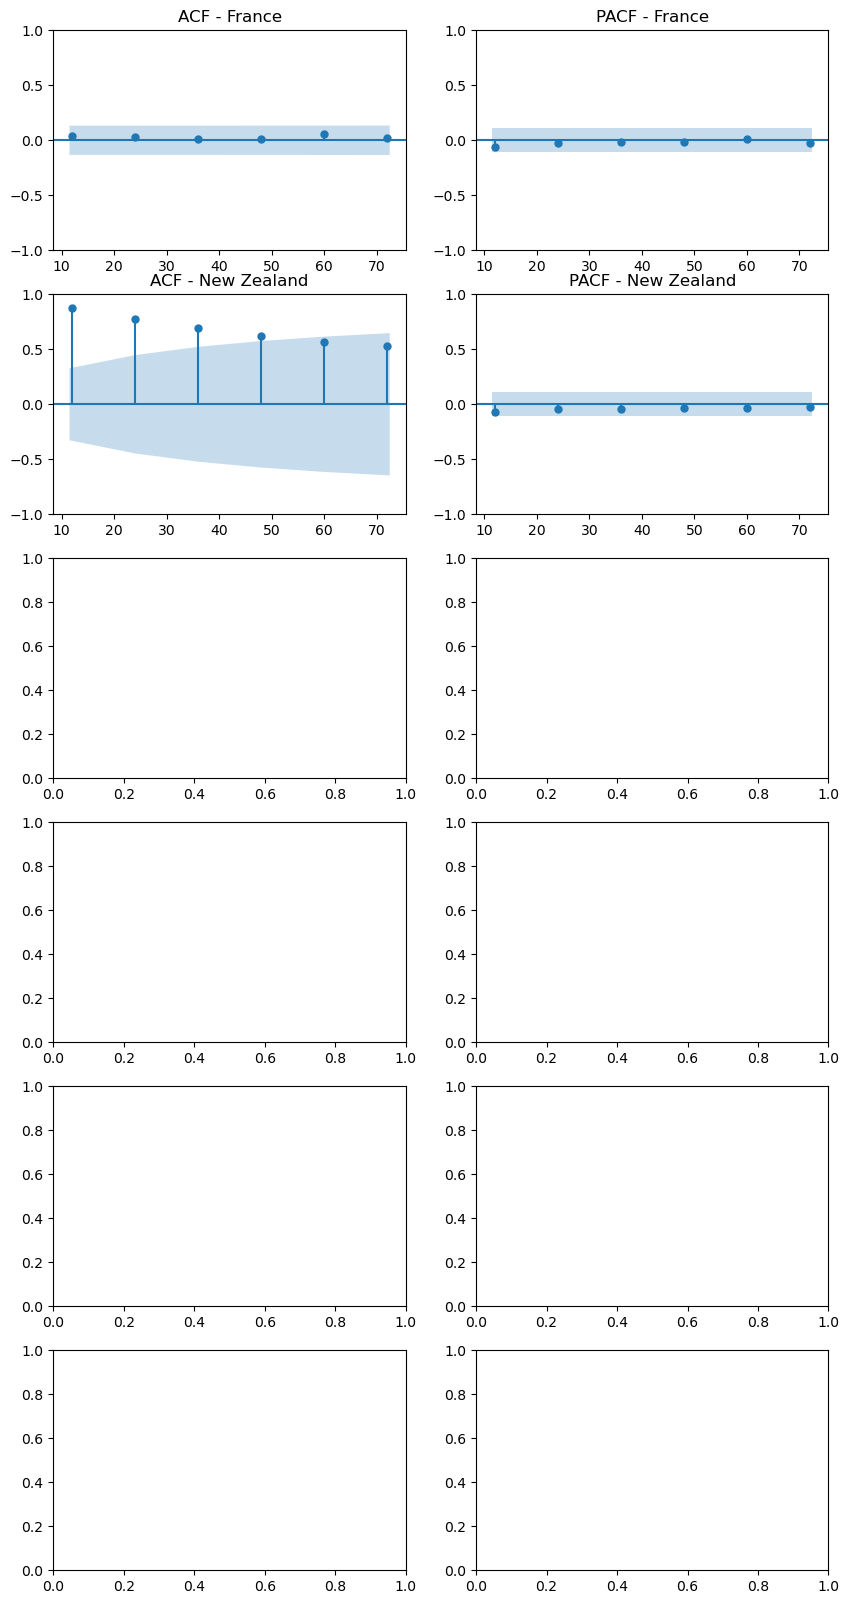

In [31]:
def plot_acf_pacf_non_seasonal(series):
    # Plot ACF and PACF for each time series
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

    for i, col in enumerate(series.columns):
        ax1 = axes[i, 0]
        ax2 = axes[i, 1]

        # Plot ACF
        plot_acf(series[col], lags=10, ax=ax1, zero=False)
        ax1.set_title(f'ACF - {col}')

        # Plot PACF
        plot_pacf(series[col], lags=10, ax=ax2, zero=False)
        ax2.set_title(f'PACF - {col}')
        
plot_acf_pacf(monthly_pop_data_2nd_diff_non_seasonal[["France", "New Zealand"]])

#### Interpreation of the ACF and PACF graph

**France**
ADD comment

### Fitting ARIMA for non-seasonal timeseries

**Non seasonal order**
* **p:** number of autoregressive terms (AR order)
* **d:** number of non-seasonal differences (differentiation order)
* **q:** number of moving average terms (MA order)

We set the order **d** at 2 because we took the second difference of our time series

#### Search the best orders over AIC and BIC criterions

For non-seasonal timeseries we will apply a ARIMA model and searching the best order over the AIC and BIC criterion

In [32]:
def select_order_arima(serie):
    order_criteria = list()

    # Loop over AR order
    for p in range(4):
        # Loop over MA order
        for q in range(4):
            # Fit model
            model = ARIMA(serie, order=(p, 2, q))
            results = model.fit()
            
            # Calculate AIC, BIC, MSE, and RMSE
            aic = results.aic
            bic = results.bic
            residuals = results.resid
            mse = (residuals ** 2).mean()
            rmse = mse ** 0.5
            
            order_criteria.append((p, q, aic, bic, mse, rmse))

    # Create a DataFrame from the list
    df = pd.DataFrame(order_criteria, columns=['p', 'q', 'AIC', 'BIC', 'MSE', 'RMSE'])
    
    # Sort the DataFrame by AIC, BIC, MSE, or RMSE in ascending or descending order
    df = df.sort_values(by=['AIC', 'BIC', 'MSE', 'RMSE'], ascending=[True, True, True, True])
    
    return df

### Focus on France time Series

In [33]:
print("###########################################")
print("ARIMA for FRANCE")
print("###########################################\n")
select_order_arima(monthly_pop_data_2nd_diff_non_seasonal["France"])

###########################################
ARIMA for FRANCE
###########################################



p  q          AIC          BIC       MSE      RMSE
3   0  3 -1714.696588 -1699.724575  0.000217  0.014741
10  2  2 -1674.093774 -1655.378758  0.000250  0.015797
15  3  3 -1670.002199 -1643.801177  0.000250  0.015800
11  2  3 -1647.793455 -1625.335436  0.000271  0.016451
2   0  2 -1578.815926 -1567.586917  0.000346  0.018613
7   1  3 -1571.112883 -1552.397867  0.000346  0.018595
13  3  1 -1555.843121 -1537.128105  0.000375  0.019367
6   1  2 -1548.759623 -1533.787610  0.000372  0.019285
14  3  2 -1512.703623 -1490.245603  0.000430  0.020725
9   2  1 -1511.994329 -1497.022317  0.000436  0.020873
5   1  1 -1431.437847 -1420.208837  0.000570  0.023872
12  3  0 -1358.007616 -1343.035604  0.000724  0.026913
8   2  0 -1276.071463 -1264.842454  0.000950  0.030826
1   0  1 -1257.272657 -1249.786651  0.001007  0.031736
4   1  0 -1142.529816 -1135.043810  0.001471  0.038358
0   0  0  -890.856624  -887.113621  0.003326  0.057672

#### Let's check if we find the same order with the auto-arima library

In [34]:
model_arima = auto_arima(monthly_pop_data_2nd_diff_non_seasonal["France"], # data
                           seasonal=False, # is the time series seasonal
                           d=2, # non seasonal difference order
                           start_p=1, # initial guess for p
                           start_q=1, # initial guess for q
                           max_p=3, # max value of p to test
                           max_q=3, # max value of q to test
                           information_criterion = 'aic',
                           trace = True,
                           error_action="ignore",
                           suppress_warnings=True
                           )

model_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-1377.951, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-888.857, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1140.530, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-890.857, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-1507.578, Time=0.49 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-1274.072, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-1549.531, Time=0.53 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-1356.008, Time=0.14 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-1500.853, Time=0.61 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-1447.519, Time=0.68 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0] intercept
Total fit time: 3.729 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  314
Model:               SARIMAX(3, 2, 1)   Log Likelihood                 780.766
Date:                Sat, 11 Nov 2023   AIC                          -1549.531
Time:                        22:38:54   BIC                          -1527.073
Sample:                    03-01-1994   HQIC                         -1540.555
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -6.022e-06   3.69e-05     -0.163      0.870   -7.84e-05    6.63e-05
ar.L1         -1.1252      0.015    -76.876      0.000      -1.154      -1.097
ar.L2         -0.8617      0.024    -36.199      0.000      -0.908      -0.815
ar.L3         -0.3619      0.016    -22.037      0.000      -0.394      -0.330
ma.L1         -0.9849      0.024    -40.442      0.000      -1.033      -0.937
sigma2         0.0004   8.37e-06     44.392      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   7.16   Jarque-Bera (JB):            108291.01
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              47.28   Skew:                             1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        94.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Check the residuals of the ARIMA

Finally check that the residuals of the ARIMA you retain are not serially correlated. To do so we will perform an ACF and Liung-Box-test and plot different graphics such as Normal Q-Q, Histogram + estimated density and correlogram

**Residuals plot**

This plot shows the standardized residuals. If our model works correctly, there should be no obvious structure in the residuals.

**Histogram + estimated density**

The histogram shows the distribution of residuals.

**Normal Q-Q**

The normal Q-Q diagram is another way of showing how the distribution of model residuals compares to a normal distribution. If our residuals are normally distributed, all points should lie along the line.

**Correlogram**

The final graph is the correlogram, which is simply an ACF graph of the residuals rather than the data. 95% of correlations for a shift greater than zero should not be significant. If there is a significant correlation in the residuals, it means that there is information in the data that our model has not captured.

In summary:

* Standardized residual: There are no obvious pattern in the residuals
* Histogram + KDE estimate: The KDE curve should be very similar to the normal distribution
* Normal Q-Q: Most of the data points should be lie on the straight line
* Correlogram: 95% of correlations for lag grater than zero should be significant
* Ljung-Box test

$H_0$: The residuals are independently distributed.

$H_1$: The residuals are not independently distributed; they exhibit serial correlation.

In [35]:
def check_corr_resid(serie, order):
    
    model = ARIMA(serie, order=order)
    results = model.fit()

    # Get the residuals
    residuals = results.resid

    # Print the mean of the residuals
    mean_residuals = np.mean(residuals)
    print(f"Mean of Residuals: {mean_residuals}")

    # Perform the Ljung-Box test
    df = acorr_ljungbox(residuals, lags=3, return_df=True)
    
    if any(df["lb_pvalue"]<0.05):
        print("We reject H0 and accept H1:The residuals are not independently distributed")
        print("Serial correlation detected in residuals.")
    else:
        print("We fail to reject H0: The residuals are not independently distributed.")
        print("No significant serial correlation in residuals.")
        
    results.plot_diagnostics()
    plt.show()
    
    return df

###########################################
Check residuals of ARIMA for FRANCE
###########################################

Mean of Residuals: 0.00014418656652218548
We reject H0 and accept H1:The residuals are not independently distributed
Serial correlation detected in residuals.


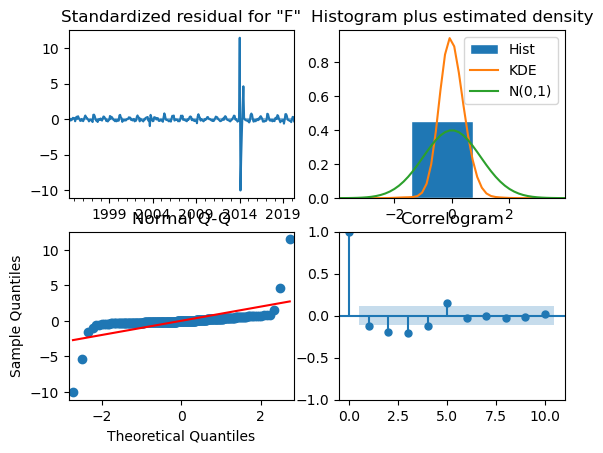

lb_stat  lb_pvalue
1   4.795065   0.028541
2  16.024198   0.000331
3  29.927656   0.000001

In [36]:
print("###########################################")
print("Check residuals of ARIMA for FRANCE")
print("###########################################\n")
check_corr_resid(monthly_pop_data_2nd_diff_non_seasonal["France"], (3,2,1))

We can draw the same conclusion for our 3 series.

The Q-Q plot of each serie looks like a Heavy tailed q-q plot. This means that, compared with the normal distribution, there is much more data in the extremities than in the center of the distribution.

Furthermore, according to the density histogram for each serie, we can see that green line showing a normal distribution is far from the orange line.

This suggest that our ARIMA model can be improve.

### Forecast the population of France

In [37]:
model = ARIMA(monthly_pop_data["France"], order=(3, 2, 1))
results = model.fit()
forecast = results.get_forecast(steps=42)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
print(mean_forecast)

2020-05-01    67.496587
2020-06-01    67.512647
2020-07-01    67.529142
2020-08-01    67.545899
2020-09-01    67.562734
2020-10-01    67.579609
2020-11-01    67.596500
2020-12-01    67.613398
2021-01-01    67.630299
2021-02-01    67.647202
2021-03-01    67.664105
2021-04-01    67.681008
2021-05-01    67.697912
2021-06-01    67.714815
2021-07-01    67.731719
2021-08-01    67.748622
2021-09-01    67.765526
2021-10-01    67.782429
2021-11-01    67.799333
2021-12-01    67.816236
2022-01-01    67.833140
2022-02-01    67.850043
2022-03-01    67.866947
2022-04-01    67.883850
2022-05-01    67.900754
2022-06-01    67.917657
2022-07-01    67.934561
2022-08-01    67.951464
2022-09-01    67.968368
2022-10-01    67.985271
2022-11-01    68.002175
2022-12-01    68.019078
2023-01-01    68.035982
2023-02-01    68.052885
2023-03-01    68.069789
2023-04-01    68.086692
2023-05-01    68.103596
2023-06-01    68.120499
2023-07-01    68.137403
2023-08-01    68.154306
2023-09-01    68.171210
2023-10-01    68

#### Plot forecast

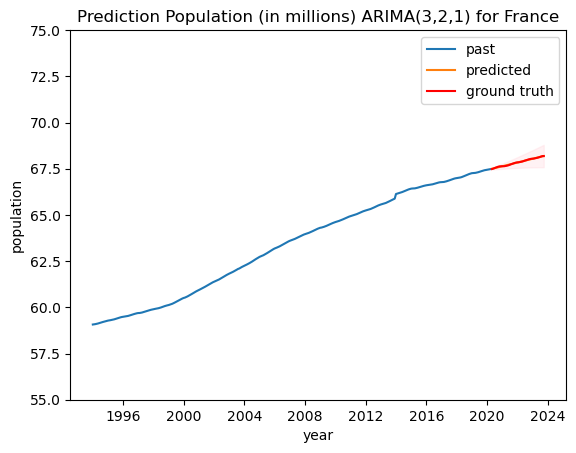

In [38]:
plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["France"], label='past')

plt.plot(mean_forecast.index, mean_forecast, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["France"], color='red', label='ground truth')

plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:,0], confidence_intervals.iloc[:,1], alpha=0.2, color='pink')

plt.title("Prediction Population (in millions) ARIMA(3,2,1) for France")

plt.xlabel("year")
plt.ylabel("population")

plt.ylim([55,75])

plt.legend()
plt.show()

#### Let's zoom on the prediction

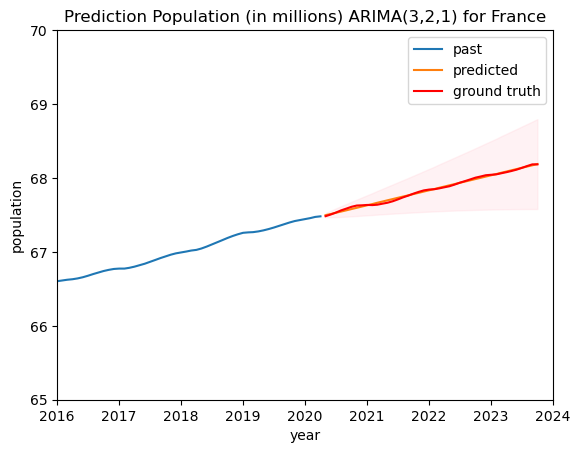

In [39]:
plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["France"], label='past')

plt.plot(mean_forecast.index, mean_forecast, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["France"], color='red', label='ground truth')

plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:,0], confidence_intervals.iloc[:,1], alpha=0.2, color='pink')

plt.title("Prediction Population (in millions) ARIMA(3,2,1) for France")

plt.xlabel("year")
plt.ylabel("population")


plt.xlim([datetime.strptime("2016-01-01", "%Y-%m-%d"), datetime.strptime("2024-01-01", "%Y-%m-%d")])
plt.ylim([65,70])

plt.legend()
plt.show()

#### Model evaluation

To evaluate the performance of the ARIMA we will apply the MSE


$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

where:
* $n$ is the number of observations,
* $y_i$ is the actual value for the $i$-th observation,
* $\hat{y}_i$ is the predicted value for the $i$-th observation.

In [40]:
mse = np.mean((monthly_covid_pop_data["France"] - mean_forecast)**2)
mse

0.00024159672620910772

### Focus on New Zealand time Series

In [41]:
print("###########################################")
print("ARIMA for NEW ZEALAND")
print("###########################################\n")
select_order_arima(monthly_pop_data_2nd_diff_non_seasonal["New Zealand"])

###########################################
ARIMA for NEW ZEALAND
###########################################



p  q          AIC          BIC       MSE      RMSE
10  2  2 -2575.236796 -2556.521781  0.000017  0.004096
11  2  3 -2573.977115 -2551.519095  0.000017  0.004091
13  3  1 -2450.074106 -2431.359090  0.000024  0.004900
15  3  3 -2427.522362 -2401.321339  0.000025  0.005017
9   2  1 -2423.171770 -2408.199757  0.000026  0.005105
14  3  2 -2393.099756 -2370.641737  0.000027  0.005171
12  3  0 -2334.076780 -2319.104768  0.000034  0.005810
8   2  0 -2132.925851 -2121.696841  0.000062  0.007902
3   0  3 -2085.450057 -2070.478045  0.000072  0.008468
2   0  2 -1791.141262 -1779.912252  0.000183  0.013510
7   1  3 -1787.873055 -1769.158039  0.000182  0.013506
5   1  1 -1555.104146 -1543.875137  0.000389  0.019715
6   1  2 -1475.900856 -1460.928843  0.000498  0.022317
1   0  1 -1462.850597 -1455.364590  0.000526  0.022936
4   1  0 -1223.173925 -1215.687919  0.001139  0.033745
0   0  0 -1125.212233 -1121.469229  0.001570  0.039617

In [42]:
model_arima = auto_arima(monthly_pop_data_2nd_diff_non_seasonal["New Zealand"], # data
                           seasonal=False, # is the time series seasonal
                           d=2, # non seasonal difference order
                           start_p=1, # initial guess for p
                           start_q=1, # initial guess for q
                           max_p=3, # max value of p to test
                           max_q=3, # max value of q to test
                           information_criterion = 'aic',
                           trace = True,
                           error_action="ignore",
                           suppress_warnings=True
                           )

model_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-1535.324, Time=0.28 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1123.212, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1221.176, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1125.212, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-2358.560, Time=0.25 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-2448.697, Time=0.53 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-2369.699, Time=0.85 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-2416.677, Time=0.24 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-2450.074, Time=0.40 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-2423.172, Time=0.19 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  314
Model:               SARIMAX(3, 2, 1)   Log Likelihood                1230.037
Date:                Sat, 11 Nov 2023   AIC                          -2450.074
Time:                        22:39:06   BIC                          -2431.359
Sample:                    03-01-1994   HQIC                         -2442.594
                         - 04-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6509      0.045    -36.950      0.000      -1.738      -1.563
ar.L2         -1.6215      0.047    -34.869      0.000      -1.713      -1.530
ar.L3         -0.6609      0.046    -14.260      0.000      -0.752      -0.570
ma.L1         -0.8472      0.061    -13.860      0.000      -0.967      -0.727
sigma2      2.127e-05   1.17e-06     18.106      0.000     1.9e-05    2.36e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):               478.20
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Check the residuals of the ARIMA

###########################################
Check residuals of ARIMA for NEW ZEALAND
###########################################

Mean of Residuals: -0.0001355545870513334
We reject H0 and accept H1:The residuals are not independently distributed
Serial correlation detected in residuals.


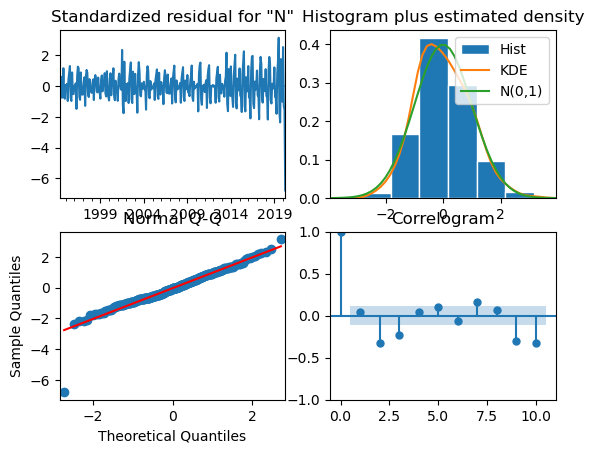

lb_stat     lb_pvalue
1   0.169723  6.803584e-01
2  29.575799  3.781786e-07
3  40.213738  9.599485e-09

In [43]:
print("###########################################")
print("Check residuals of ARIMA for NEW ZEALAND")
print("###########################################\n")
check_corr_resid(monthly_pop_data_2nd_diff_non_seasonal["New Zealand"], (3,2,1))

### Forecast the population of New Zealand

In [44]:
model = ARIMA(monthly_pop_data["New Zealand"], order=(3, 2, 1))
results = model.fit()
forecast = results.get_forecast(steps=42)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
print(mean_forecast)

2020-05-01    5.091120
2020-06-01    5.091685
2020-07-01    5.098892
2020-08-01    5.100062
2020-09-01    5.100857
2020-10-01    5.107745
2020-11-01    5.109076
2020-12-01    5.110050
2021-01-01    5.116629
2021-02-01    5.118100
2021-03-01    5.119233
2021-04-01    5.125527
2021-05-01    5.127125
2021-06-01    5.128406
2021-07-01    5.134436
2021-08-01    5.136150
2021-09-01    5.137567
2021-10-01    5.143355
2021-11-01    5.145176
2021-12-01    5.146718
2022-01-01    5.152283
2022-02-01    5.154203
2022-03-01    5.155860
2022-04-01    5.161220
2022-05-01    5.163230
2022-06-01    5.164994
2022-07-01    5.170165
2022-08-01    5.172258
2022-09-01    5.174119
2022-10-01    5.179117
2022-11-01    5.181286
2022-12-01    5.183238
2023-01-01    5.188076
2023-02-01    5.190314
2023-03-01    5.192349
2023-04-01    5.197040
2023-05-01    5.199343
2023-06-01    5.201454
2023-07-01    5.206011
2023-08-01    5.208372
2023-09-01    5.210554
2023-10-01    5.214987
Freq: MS, Name: predicted_mean, dt

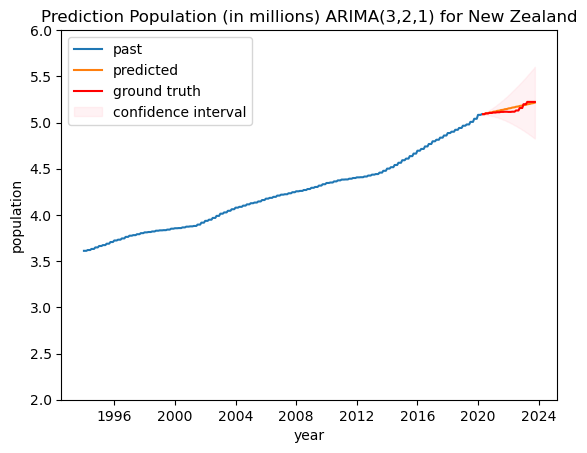

In [45]:
plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["New Zealand"], label='past')

plt.plot(mean_forecast.index, mean_forecast, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["New Zealand"], color='red', label='ground truth')

plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:,0], confidence_intervals.iloc[:,1], alpha=0.2, color='pink', label="confidence interval")

plt.title("Prediction Population (in millions) ARIMA(3,2,1) for New Zealand")

plt.xlabel("year")
plt.ylabel("population")

plt.ylim([2, 6])

plt.legend()
plt.show()

#### Let's zoom the on the prediction

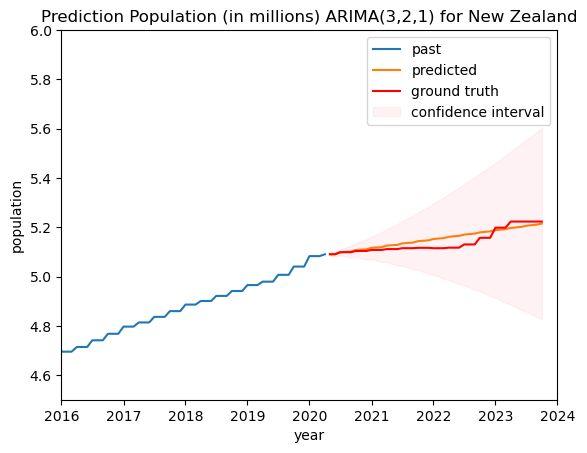

In [46]:
plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["New Zealand"], label='past')

plt.plot(mean_forecast.index, mean_forecast, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["New Zealand"], color='red', label='ground truth')

plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:,0], confidence_intervals.iloc[:,1], alpha=0.2, color='pink', label="confidence interval")

plt.title("Prediction Population (in millions) ARIMA(3,2,1) for New Zealand")

plt.xlabel("year")
plt.ylabel("population")

plt.xlim([datetime.strptime("2016-01-01", "%Y-%m-%d"), datetime.strptime("2024-01-01", "%Y-%m-%d")])
plt.ylim([4.5, 6])

plt.legend()
plt.show()

#### Model evaluation

In [47]:
mse = np.mean((monthly_covid_pop_data["New Zealand"] - mean_forecast)**2)
mse

0.0006093321508640581

### Fitting SARIMA for seasonal time series

We will use the package pmdarima to chose the best order for a SARIMA model.


$SARIMA(p,d,q)(P,D,Q)_s$

* P: seasonal AR order
* D: seasonal differencing order
* Q: seasonal MA order
* S: number of time step per cycle (i.e 12 in our case as we identify previously thanks to the ACF plot)

### Focus on Argantina time series

#### Search orders for SARIMA model

In [48]:
select_model_sarima = auto_arima(monthly_pop_data_2nd_diff["Argentina"], # data
                           seasonal=True, # is the time series seasonal
                           m=12, #  seasonal period
                           D=2, # seasonal difference order
                           start_P=1, # initial guess for p
                           start_Q=1, # initial guess for q
                           max_Q=3, # max value of p to test
                           max_P=3, # max value of q to test
                           information_criterion = 'aic',
                           trace = True,
                           error_action="ignore",
                           suppress_warnings=True
                           )

select_model_sarima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,2,1)[12]             : AIC=inf, Time=7.83 sec
 ARIMA(0,0,0)(0,2,0)[12]             : AIC=-1929.113, Time=0.14 sec
 ARIMA(1,0,0)(1,2,0)[12]             : AIC=-1956.174, Time=0.59 sec
 ARIMA(0,0,1)(0,2,1)[12]             : AIC=inf, Time=2.27 sec
 ARIMA(1,0,0)(0,2,0)[12]             : AIC=-1927.113, Time=0.22 sec
 ARIMA(1,0,0)(2,2,0)[12]             : AIC=-2108.054, Time=3.87 sec
 ARIMA(1,0,0)(3,2,0)[12]             : AIC=-2113.972, Time=4.09 sec
 ARIMA(1,0,0)(3,2,1)[12]             : AIC=-2176.188, Time=15.05 sec
 ARIMA(1,0,0)(2,2,1)[12]             : AIC=-2126.029, Time=3.91 sec
 ARIMA(1,0,0)(3,2,2)[12]             : AIC=inf, Time=19.21 sec
 ARIMA(1,0,0)(2,2,2)[12]             : AIC=inf, Time=10.88 sec
 ARIMA(0,0,0)(3,2,1)[12]             : AIC=-2172.255, Time=17.36 sec
 ARIMA(2,0,0)(3,2,1)[12]             : AIC=-2175.169, Time=16.46 sec
 ARIMA(1,0,1)(3,2,1)[12]             : AIC=-2181.262, Time=25.55 sec
 ARIMA(1,0,1)(2,2,1)[12

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  303
Model:             SARIMAX(1, 0, 1)x(3, 2, [1, 2], 12)   Log Likelihood                1122.580
Date:                                 Sat, 11 Nov 2023   AIC                          -2229.160
Time:                                         22:45:19   BIC                          -2200.111
Sample:                                     02-01-1995   HQIC                         -2217.507
                                          - 04-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        1.85e-05   6.98e-08    264.994      0.000    1.84e-05    1.86e-05
ma.L1       -1.85e-05   6.48e-08   -285.487      0.000   -1.86e-05   -1.84e-05
ar.S.L12      -0.8567      0.058    -14.712      0.000      -0.971      -0.743
ar.S.L24      -0.7159      0.045    -16.050      0.000      -0.803      -0.628
ar.S.L36      -0.2177      0.048     -4.490      0.000      -0.313      -0.123
ma.S.L12      -0.0565      0.073     -0.775      0.438      -0.199       0.086
ma.S.L24      -0.7112      0.058    -12.201      0.000      -0.825      -0.597
sigma2      1.587e-05    8.7e-07     18.246      0.000    1.42e-05    1.76e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             18223.61
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.15e+23. Standard errors may be unstable.
"""

In [49]:
sarima_model = sm.tsa.statespace.SARIMAX(monthly_pop_data["Argentina"],
                                         order=(1, 0, 1),
                                         seasonal_order=(3,2,2,12))
results=sarima_model.fit()

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               Argentina   No. Observations:                  316
Model:             SARIMAX(1, 0, 1)x(3, 2, [1, 2], 12)   Log Likelihood                1244.053
Date:                                 Sat, 11 Nov 2023   AIC                          -2472.106
Time:                                         22:45:36   BIC                          -2442.692
Sample:                                     01-01-1994   HQIC                         -2460.324
                                          - 04-01-2020                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9193      0.028     32.263      0.000       0.863       0.975
ma.L1          0.1798      0.083      2.164      0.030       0.017       0.343
ar.S.L12      -0.4954      0.048    -10.393      0.000      -0.589      -0.402
ar.S.L24      -0.5200      0.020    -26.497      0.000      -0.559      -0.482
ar.S.L36      -0.0855      0.043     -1.992      0.046      -0.170      -0.001
ma.S.L12      -0.0492      0.057     -0.859      0.390      -0.161       0.063
ma.S.L24      -0.7434      0.032    -22.916      0.000      -0.807      -0.680
sigma2       1.03e-05   3.98e-07     25.905      0.000    9.52e-06    1.11e-05
===================================================================================
Ljung-Box (L1) (Q):                   2.10   Jarque-Bera (JB):              4294.00
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                             1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Check the residuals of the SARIMA

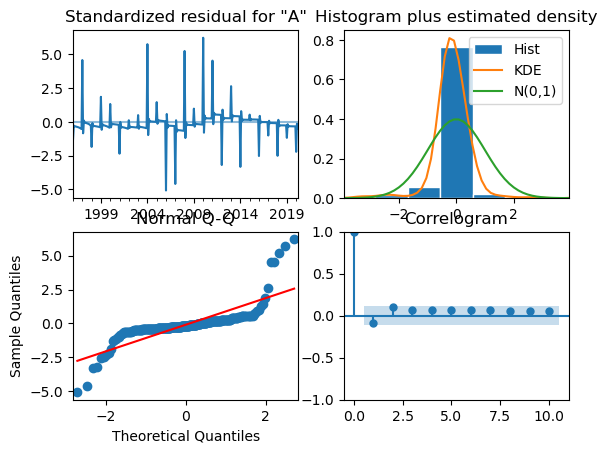

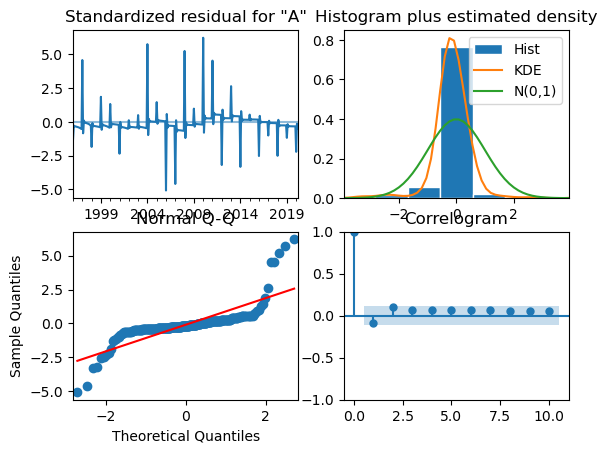

In [51]:
results.plot_diagnostics()

#### Forecasting during the COVID period

In [52]:
forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean
print(mean)

2020-05-01    45.480612
2020-06-01    45.482247
2020-07-01    45.483753
2020-08-01    45.485139
2020-09-01    45.486416
2020-10-01    45.487593
2020-11-01    45.488679
2020-12-01    45.489680
2021-01-01    45.877066
2021-02-01    45.877905
2021-03-01    45.878678
2021-04-01    45.879390
2021-05-01    45.882221
2021-06-01    45.885208
2021-07-01    45.887960
2021-08-01    45.890497
2021-09-01    45.892837
2021-10-01    45.894995
2021-11-01    45.896988
2021-12-01    45.898829
2022-01-01    46.287088
2022-02-01    46.288618
2022-03-01    46.290029
2022-04-01    46.291331
2022-05-01    46.293903
2022-06-01    46.296514
2022-07-01    46.298923
2022-08-01    46.301146
2022-09-01    46.303199
2022-10-01    46.305097
2022-11-01    46.306852
2022-12-01    46.308478
2023-01-01    46.693725
2023-02-01    46.695064
2023-03-01    46.696300
2023-04-01    46.697443
2023-05-01    46.700096
2023-06-01    46.702824
2023-07-01    46.705342
2023-08-01    46.707667
2023-09-01    46.709816
2023-10-01    46

#### Plot the forecast

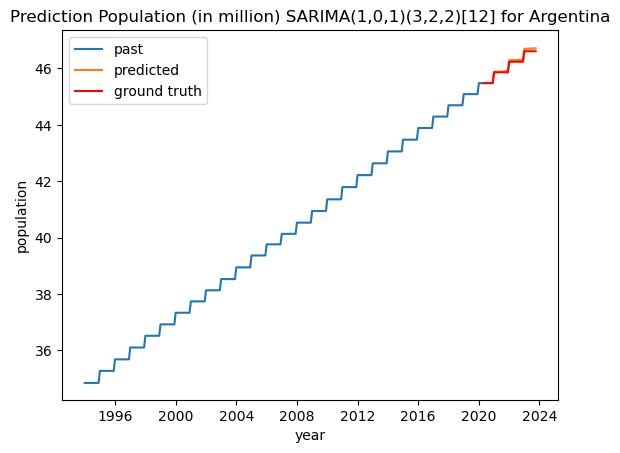

In [53]:
forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["Argentina"], label='past')

plt.plot(dates, mean, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["Argentina"], color='red', label='ground truth')

plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

plt.title("Prediction Population (in million) SARIMA(1,0,1)(3,2,2)[12] for Argentina")

plt.xlabel("year")
plt.ylabel("population")

plt.legend()
plt.show()

#### Let's zoom on the prediction

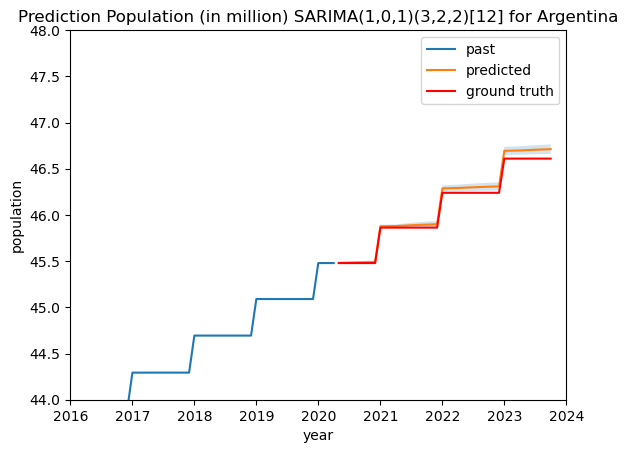

In [54]:
forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["Argentina"], label='past')

plt.plot(dates, mean, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["Argentina"], color='red', label='ground truth')

plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

plt.title("Prediction Population (in million) SARIMA(1,0,1)(3,2,2)[12] for Argentina")

plt.xlabel("year")
plt.ylabel("population")

plt.xlim([datetime.strptime("2016-01-01", "%Y-%m-%d"), datetime.strptime("2024-01-01", "%Y-%m-%d")])
plt.ylim([44, 48])

plt.legend()
plt.show()





#### Model Evaluation

In [55]:
mse = np.mean((monthly_covid_pop_data["Argentina"] - mean)**2)
mse

0.003220403235638586

### Focus on China time series

#### Search orders for SARIMA model

In [56]:
select_model_sarima = auto_arima(monthly_pop_data_2nd_diff["China"], # data
                           seasonal=True, # is the time series seasonal
                           m=12, #  seasonal period
                           D=2, # seasonal difference order
                           start_P=1, # initial guess for p
                           start_Q=1, # initial guess for q
                           max_Q=3, # max value of p to test
                           max_P=3, # max value of q to test
                           information_criterion = 'aic',
                           trace = True,
                           error_action="ignore",
                           suppress_warnings=True
                           )

select_model_sarima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,2,1)[12]             : AIC=inf, Time=8.62 sec
 ARIMA(0,0,0)(0,2,0)[12]             : AIC=799.875, Time=0.12 sec
 ARIMA(1,0,0)(1,2,0)[12]             : AIC=546.766, Time=0.35 sec
 ARIMA(0,0,1)(0,2,1)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(1,0,0)(0,2,0)[12]             : AIC=801.875, Time=0.15 sec
 ARIMA(1,0,0)(2,2,0)[12]             : AIC=426.111, Time=1.51 sec
 ARIMA(1,0,0)(3,2,0)[12]             : AIC=409.897, Time=2.23 sec
 ARIMA(1,0,0)(3,2,1)[12]             : AIC=inf, Time=14.46 sec
 ARIMA(1,0,0)(2,2,1)[12]             : AIC=inf, Time=6.38 sec
 ARIMA(0,0,0)(3,2,0)[12]             : AIC=407.897, Time=1.34 sec
 ARIMA(0,0,0)(2,2,0)[12]             : AIC=424.111, Time=0.86 sec
 ARIMA(0,0,0)(3,2,1)[12]             : AIC=inf, Time=13.36 sec
 ARIMA(0,0,0)(2,2,1)[12]             : AIC=inf, Time=4.64 sec
 ARIMA(0,0,1)(3,2,0)[12]             : AIC=409.897, Time=1.78 sec
 ARIMA(1,0,1)(3,2,0)[12]             : AIC=411.897, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  303
Model:             SARIMAX(3, 2, 0, 12)   Log Likelihood                -199.949
Date:                  Sat, 11 Nov 2023   AIC                            407.897
Time:                          22:46:44   BIC                            422.422
Sample:                      02-01-1995   HQIC                           413.724
                           - 04-01-2020                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -1.4046      0.034    -41.005      0.000      -1.472      -1.337
ar.S.L24      -0.9428      0.042    -22.680      0.000      -1.024      -0.861
ar.S.L36      -0.2759      0.022    -12.444      0.000      -0.319      -0.232
sigma2         0.2248      0.003     68.966      0.000       0.218       0.231
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             55242.06
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              33.20   Skew:                            -2.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
sarima_model = sm.tsa.statespace.SARIMAX(monthly_pop_data["China"],
                                         order=(0, 0, 0),
                                         seasonal_order=(3,2,0,12))
results=sarima_model.fit()

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                    China   No. Observations:                  316
Model:             SARIMAX(3, 2, 0, 12)   Log Likelihood                -469.251
Date:                  Sat, 11 Nov 2023   AIC                            946.503
Time:                          22:46:45   BIC                            961.210
Sample:                      01-01-1994   HQIC                           952.394
                           - 04-01-2020                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1045      0.061     -1.702      0.089      -0.225       0.016
ar.S.L24       0.2537      0.073      3.456      0.001       0.110       0.398
ar.S.L36       0.0872      0.087      0.999      0.318      -0.084       0.258
sigma2         1.4471      0.128     11.333      0.000       1.197       1.697
===================================================================================
Ljung-Box (L1) (Q):                 242.91   Jarque-Bera (JB):                 3.80
Prob(Q):                              0.00   Prob(JB):                         0.15
Heteroskedasticity (H):               8.55   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Check the residuals of the SARIMA

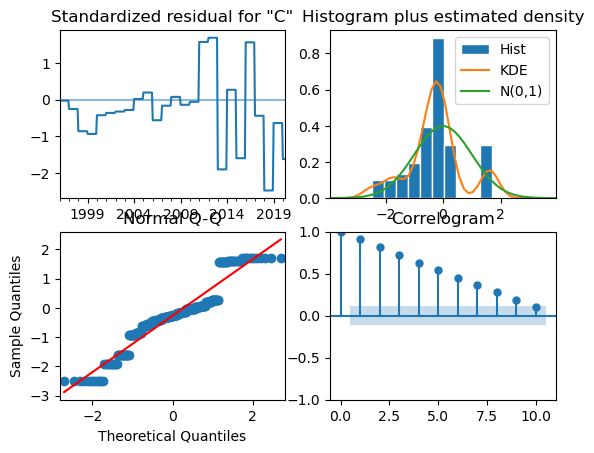

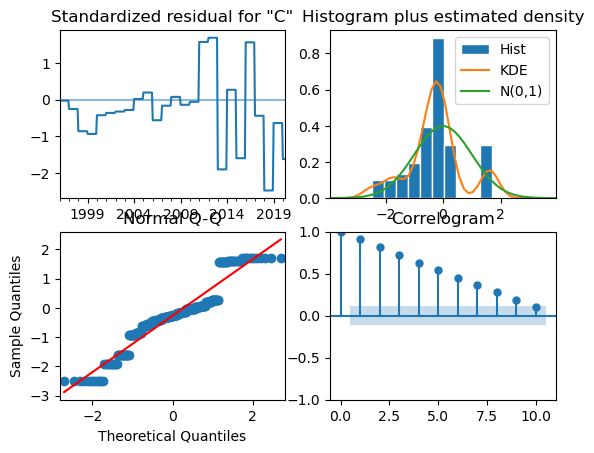

In [59]:
results.plot_diagnostics()

#### Forecasting during the COVID period

In [60]:
forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean
print(mean)

2020-05-01    1414.073299
2020-06-01    1414.073299
2020-07-01    1414.073299
2020-08-01    1414.073299
2020-09-01    1414.073299
2020-10-01    1414.073299
2020-11-01    1414.073299
2020-12-01    1414.073299
2021-01-01    1414.057722
2021-02-01    1414.057722
2021-03-01    1414.057722
2021-04-01    1414.057722
2021-05-01    1417.760274
2021-06-01    1417.760274
2021-07-01    1417.760274
2021-08-01    1417.760274
2021-09-01    1417.760274
2021-10-01    1417.760274
2021-11-01    1417.760274
2021-12-01    1417.760274
2022-01-01    1415.283916
2022-02-01    1415.283916
2022-03-01    1415.283916
2022-04-01    1415.283916
2022-05-01    1421.252613
2022-06-01    1421.252613
2022-07-01    1421.252613
2022-08-01    1421.252613
2022-09-01    1421.252613
2022-10-01    1421.252613
2022-11-01    1421.252613
2022-12-01    1421.252613
2023-01-01    1416.329105
2023-02-01    1416.329105
2023-03-01    1416.329105
2023-04-01    1416.329105
2023-05-01    1424.628546
2023-06-01    1424.628546
2023-07-01  

#### Plot the forecast time series

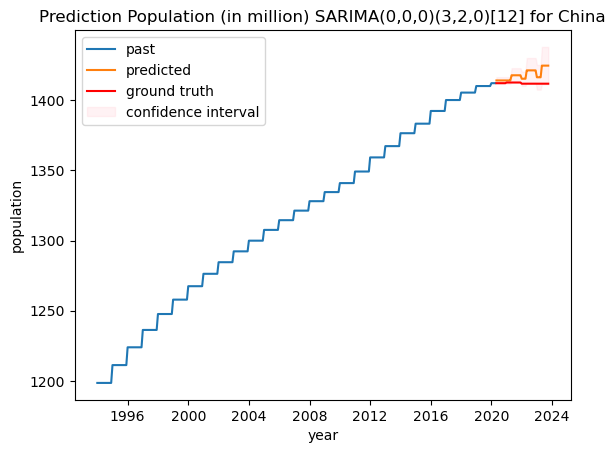

In [61]:
forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["China"], label='past')

plt.plot(dates, mean, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["China"], color='red', label='ground truth')

plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, label='confidence interval', color='pink')

plt.title("Prediction Population (in million) SARIMA(0,0,0)(3,2,0)[12] for China")

plt.xlabel("year")
plt.ylabel("population")

plt.legend()
plt.show()

#### Let's zoom on the prediction

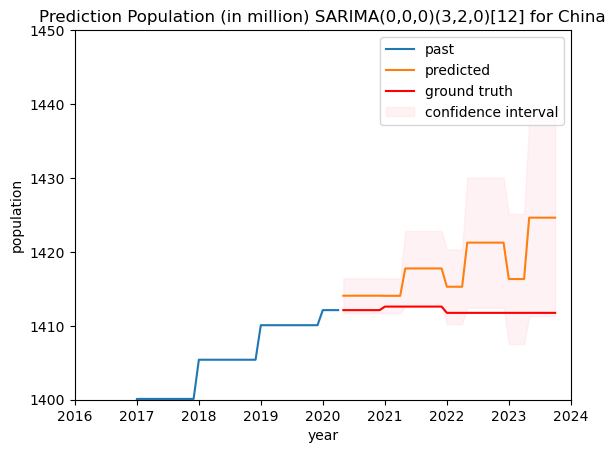

In [62]:
forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["China"], label='past')

plt.plot(dates, mean, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["China"], color='red', label='ground truth')

plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, label='confidence interval', color='pink')

plt.title("Prediction Population (in million) SARIMA(0,0,0)(3,2,0)[12] for China")

plt.xlabel("year")
plt.ylabel("population")

plt.xlim([datetime.strptime("2016-01-01", "%Y-%m-%d"), datetime.strptime("2024-01-01", "%Y-%m-%d")])
plt.ylim([1400, 1450])

plt.legend()
plt.show()

#### Model Evaluation

In [63]:
mse = np.mean((monthly_covid_pop_data["China"] - mean)**2)
mse

50.08134012779759

### Focus on Norway time series

#### Search orders for SARIMA model

In [64]:
select_model_sarima = auto_arima(monthly_pop_data_2nd_diff["Norway"], # data
                           seasonal=True, # is the time series seasonal
                           m=12, #  seasonal period
                           D=2, # seasonal difference order
                           start_P=1, # initial guess for p
                           start_Q=1, # initial guess for q
                           max_Q=3, # max value of p to test
                           max_P=3, # max value of q to test
                           information_criterion = 'aic',
                           trace = True,
                           error_action="ignore",
                           suppress_warnings=True
                           )

select_model_sarima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,2,1)[12]             : AIC=-2593.597, Time=1.26 sec
 ARIMA(0,0,0)(0,2,0)[12]             : AIC=-2414.156, Time=0.19 sec
 ARIMA(1,0,0)(1,2,0)[12]             : AIC=-2501.959, Time=1.34 sec
 ARIMA(0,0,1)(0,2,1)[12]             : AIC=-2410.157, Time=0.61 sec
 ARIMA(2,0,2)(0,2,1)[12]             : AIC=inf, Time=7.08 sec
 ARIMA(2,0,2)(1,2,0)[12]             : AIC=-2495.959, Time=1.70 sec
 ARIMA(2,0,2)(2,2,1)[12]             : AIC=-2637.858, Time=20.43 sec
 ARIMA(2,0,2)(2,2,0)[12]             : AIC=-2604.647, Time=2.79 sec
 ARIMA(2,0,2)(3,2,1)[12]             : AIC=-2654.965, Time=21.84 sec
 ARIMA(2,0,2)(3,2,0)[12]             : AIC=-2617.754, Time=4.87 sec
 ARIMA(2,0,2)(3,2,2)[12]             : AIC=-2650.100, Time=19.83 sec
 ARIMA(2,0,2)(2,2,2)[12]             : AIC=-2651.708, Time=17.95 sec
 ARIMA(1,0,2)(3,2,1)[12]             : AIC=-2657.095, Time=23.80 sec
 ARIMA(1,0,2)(2,2,1)[12]             : AIC=-2639.858, Time=8.06 sec
 ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  303
Model:             SARIMAX(0, 0, 2)x(3, 2, [1], 12)   Log Likelihood                1336.545
Date:                              Sat, 11 Nov 2023   AIC                          -2659.090
Time:                                      22:52:03   BIC                          -2633.671
Sample:                                  02-01-1995   HQIC                         -2648.893
                                       - 04-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -5.234e-06   4.06e-08   -128.985      0.000   -5.31e-06   -5.15e-06
ma.L2      -5.254e-06   4.11e-08   -127.955      0.000   -5.33e-06   -5.17e-06
ar.S.L12      -0.6114      0.045    -13.536      0.000      -0.700      -0.523
ar.S.L24      -0.4213      0.048     -8.809      0.000      -0.515      -0.328
ar.S.L36      -0.0233      0.034     -0.692      0.489      -0.089       0.043
ma.S.L12      -0.6936      0.042    -16.626      0.000      -0.775      -0.612
sigma2      3.682e-06      1e-07     36.780      0.000    3.49e-06    3.88e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12413.41
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -1.22
Prob(H) (two-sided):                  0.80   Kurtosis:                        35.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+22. Standard errors may be unstable.
"""

#### Fitting SARIMA(0,0,2)(3,2,1)[12]

In [65]:
sarima_model = sm.tsa.statespace.SARIMAX(monthly_pop_data["Norway"],
                                         order=(0, 0, 2),
                                         seasonal_order=(3,2,1,12))
results=sarima_model.fit()

### Check the residuals of the SARIMA

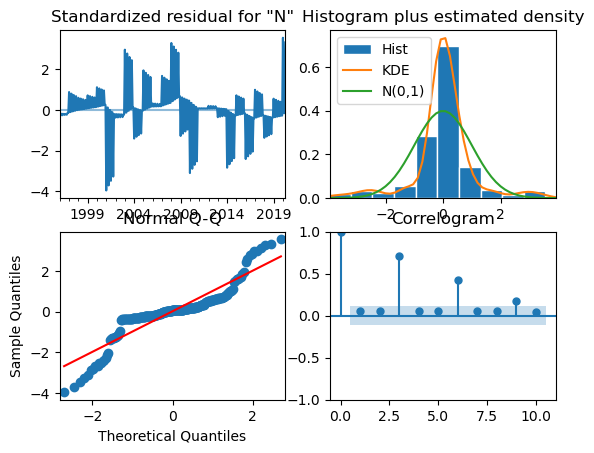

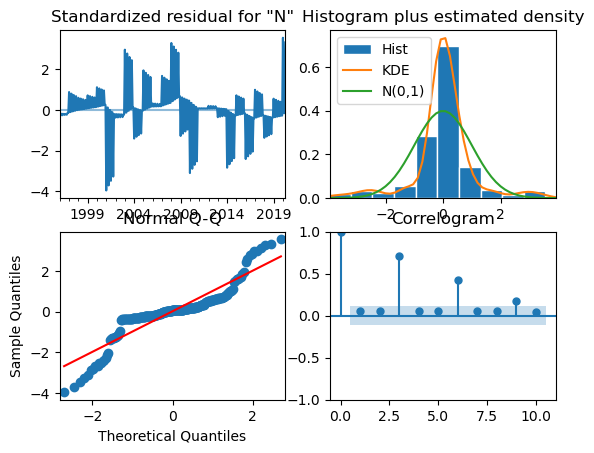

In [66]:
results.plot_diagnostics()

#### Forecasting during the covid period

In [67]:
results.get_forecast(steps=42)

forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean
print(mean)

2020-05-01    5.367729
2020-06-01    5.367849
2020-07-01    5.358420
2020-08-01    5.358420
2020-09-01    5.358420
2020-10-01    5.358420
2020-11-01    5.358420
2020-12-01    5.358420
2021-01-01    5.407526
2021-02-01    5.407526
2021-03-01    5.407526
2021-04-01    5.407526
2021-05-01    5.407873
2021-06-01    5.408151
2021-07-01    5.386246
2021-08-01    5.386246
2021-09-01    5.386246
2021-10-01    5.386246
2021-11-01    5.386246
2021-12-01    5.386246
2022-01-01    5.446576
2022-02-01    5.446576
2022-03-01    5.446576
2022-04-01    5.446576
2022-05-01    5.447135
2022-06-01    5.447584
2022-07-01    5.412231
2022-08-01    5.412231
2022-09-01    5.412231
2022-10-01    5.412231
2022-11-01    5.412231
2022-12-01    5.412231
2023-01-01    5.486914
2023-02-01    5.486914
2023-03-01    5.486914
2023-04-01    5.486914
2023-05-01    5.487725
2023-06-01    5.488376
2023-07-01    5.437082
2023-08-01    5.437082
2023-09-01    5.437082
2023-10-01    5.437082
Freq: MS, Name: predicted_mean, dt

#### Plot the forecast time series

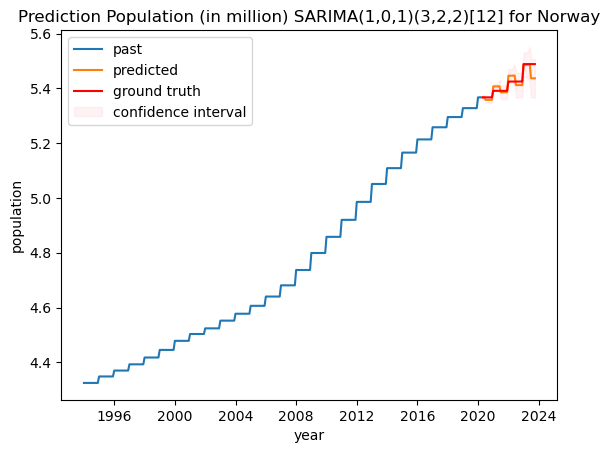

In [68]:
forecast_object = results.get_forecast(steps=42)

mean = forecast_object.predicted_mean

conf_int = forecast_object.conf_int()

dates = mean.index

plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["Norway"], label='past')

plt.plot(dates, mean, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["Norway"], color='red', label='ground truth')

plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, label='confidence interval', color='pink')

plt.title("Prediction Population (in million) SARIMA(1,0,1)(3,2,2)[12] for Norway")

plt.xlabel("year")
plt.ylabel("population")

plt.legend()
plt.show()

#### Let's zoom on the prediction

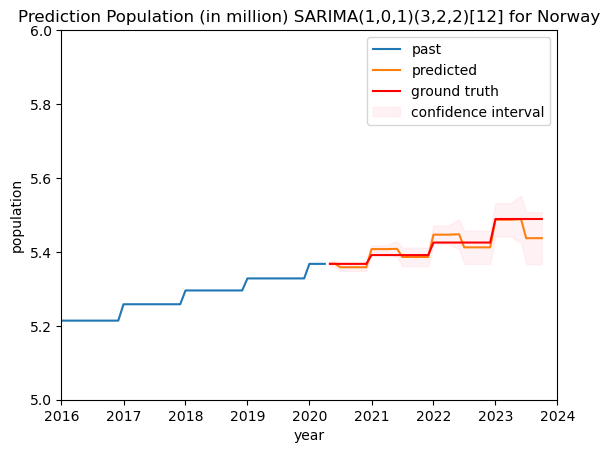

In [69]:
plt.figure()

plt.plot(monthly_pop_data.index, monthly_pop_data["Norway"], label='past')

plt.plot(dates, mean, label='predicted')

plt.plot(monthly_covid_pop_data.index, monthly_covid_pop_data["Norway"], color='red', label='ground truth')

plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, label='confidence interval', color='pink')

plt.title("Prediction Population (in million) SARIMA(1,0,1)(3,2,2)[12] for Norway")

plt.xlabel("year")
plt.ylabel("population")

plt.xlim([datetime.strptime("2016-01-01", "%Y-%m-%d"), datetime.strptime("2024-01-01", "%Y-%m-%d")])
plt.ylim([5, 6])
plt.legend()
plt.show()

#### Model Evaluation

In [70]:
mse = np.mean((monthly_covid_pop_data["Norway"] - mean)**2)
mse

0.00040156008486955965